#**Importing Libraries and dataset**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
data=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

#**Basic Cleaning and Exploration**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [21]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [22]:
data.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


In [23]:
pd.set_option('display.max_columns', None)
# to display all columns

In [24]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [25]:
data.shape

(144867, 24)

In [26]:
data.ndim

2

In [27]:
data.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [28]:
data.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [29]:
# Function to create a data frame with number and percentage of missing data in a data frame

def missing_values(data):
    # Number and percentage of missing data in data set for each column
    total_missing_data = data.isnull().sum().sort_values(ascending =False)
    percent_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing_values_data = pd.concat([total_missing_data, percent_missing_data], axis=1, keys=['Total', 'Percent'])
    return missing_values_data


In [30]:
missing_data=missing_values(data)
missing_data

,Total,Percent
source_name,293,0.202254
destination_name,261,0.180165
data,0,0.000000
cutoff_factor,0,0.000000
segment_osrm_distance,0,0.000000
segment_osrm_time,0,0.000000
segment_actual_time,0,0.000000
factor,0,0.000000
osrm_distance,0,0.000000
osrm_time,0,0.000000


In [31]:
data.dropna(inplace=True)

In [32]:
data.isnull().sum().sum()

0

#**Understanding the flow**

In [33]:
data_copy=data.copy()

In [34]:
data_copy_grouped=data_copy.groupby(['trip_uuid','source_center','destination_center']).count().reset_index()
data_copy_grouped

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671041653548748,IND209304AAA,IND000000ACB,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
1,trip-153671041653548748,IND462022AAA,IND209304AAA,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
2,trip-153671042288605164,IND561203AAB,IND562101AAA,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,trip-153671042288605164,IND572101AAA,IND561203AAB,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4,trip-153671043369099517,IND000000ACB,IND160002AAC,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
26219,trip-153861115439069069,IND628801AAA,IND628204AAA,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
26220,trip-153861118270144424,IND583119AAA,IND583101AAA,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [35]:
data_copy[data_copy['trip_uuid']=='trip-153671041653548748']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
124981,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,22,2018-09-12 14:56:29,22.812439,43.0,39.0,55.2597,1.102564,43.0,39.0,55.2597,1.102564
124982,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,44,2018-09-12 14:30:33,45.902553,69.0,35.0,49.4845,1.971429,25.0,52.0,73.8647,0.480769
124983,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,66,2018-09-12 13:14:28,68.090371,146.0,51.0,72.5479,2.862745,76.0,16.0,23.0634,4.750000
124984,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,88,2018-09-12 12:38:29,88.382207,181.0,66.0,93.9641,2.742424,35.0,15.0,21.4162,2.333333
124985,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,110,2018-09-12 12:14:30,110.168313,205.0,82.0,117.2332,2.500000,23.0,16.0,23.2691,1.437500
124986,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,132,2018-09-12 11:46:27,133.062129,234.0,99.0,141.1550,2.363636,28.0,16.0,23.9218,1.750000
124987,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,154,2018-09-12 11:24:24,154.393443,256.0,116.0,164.9134,2.206897,22.0,16.0,23.7584,1.375000
124988,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,176,2018-09-12 10:54:26,177.997213,286.0,134.0,190.8280,2.134328,29.0,18.0,25.9146,1.611111
124989,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,198,2018-09-12 10:22:24,199.007702,318.0,153.0,216.2362,2.078431,32.0,18.0,25.4082,1.777778
124990,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,220,2

##Converting the datatype to datetime format

In [36]:
#changing datatype of date like columns from object to timestamp
data_copy[["od_start_time", "od_end_time",'trip_creation_time']] = data_copy[["od_start_time", "od_end_time",'trip_creation_time']].apply(pd.to_datetime)
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

#**Extracting and Creating New Columns**

In [37]:
#extracting day, month & year from trip_creation_time
data_copy['trip_creation_month']=data_copy['trip_creation_time'].dt.month
data_copy['trip_creation_year']=data_copy['trip_creation_time'].dt.year
data_copy['trip_creation_day']=data_copy['trip_creation_time'].dt.day
data_copy.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_month,trip_creation_year,trip_creation_day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.43566,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,9,2018,20


In [38]:
#difference between od_start & od_end time in hours
data_copy['Timediff_start_end_H']=round((data_copy['od_end_time']-data_copy['od_start_time'])/pd.Timedelta(minutes=1),2)
data_copy.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.43566,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,9,2018,20,86.21


#Analyzing a single trip and its flow.

In [39]:
data_copy[data_copy['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,9,2018,20,86.21
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,9,2018,20,86.21
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,9,2018,20,86.21
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,9,2018,20,86.21
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,9,2018,20,86.21
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,9,2018,20,109.17
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,9,2018,20,109.17
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091,9,2018,20,109.17
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000,9,2018,20,109.17
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47

#**Creating Features**

In [40]:
#as below mentioned columns are comprising of segment related details we will do a cum. sum
data_copy['agg_segment_actual_time']=data_copy.groupby(['trip_uuid','source_center','destination_center'])['segment_actual_time'].transform('cumsum')
data_copy['agg_segment_osrm_time']=data_copy.groupby(['trip_uuid','source_center','destination_center'])['segment_osrm_time'].transform('cumsum')
data_copy['agg_segment_osrm_distance']=data_copy.groupby(['trip_uuid','source_center','destination_center'])['segment_osrm_distance'].transform('cumsum')

In [41]:
data_copy.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time,agg_segment_osrm_time,agg_segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,9,2018,20,86.21,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,9,2018,20,86.21,24.0,20.0,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,9,2018,20,86.21,40.0,27.0,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,9,2018,20,86.21,61.0,39.0,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,9,2018,20,86.21,67.0,44.0,49.4772


In [42]:
#After finding out the cum. sum of above columns we will pick their max
data_copy['agg_segment_actual_time1']=data_copy.groupby(['trip_uuid','source_center','destination_center'])['agg_segment_actual_time'].transform('max')
data_copy['agg_segment_osrm_time1']=data_copy.groupby(['trip_uuid','source_center','destination_center'])['agg_segment_osrm_time'].transform('max')
data_copy['agg_segment_osrm_distance1']=data_copy.groupby(['trip_uuid','source_center','destination_center'])['agg_segment_osrm_distance'].transform('max')

data_copy.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time,agg_segment_osrm_time,agg_segment_osrm_distance,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,9,2018,20,86.21,14.0,11.0,11.9653,67.0,44.0,49.4772
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,9,2018,20,86.21,24.0,20.0,21.7243,67.0,44.0,49.4772
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,9,2018,20,86.21,40.0,27.0,32.5395,67.0,44.0,49.4772
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,9,2018,20,86.21,61.0,39.0,45.5619,67.0,44.0,49.4772
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,9,2018,20,86.21,67.0,44.0,49.4772,67.0,44.0,49.4772


In [43]:
# aggregation of below mentioned based on their Trip_uuid, Source ID and Destination ID
# as they are mentioned as a cumsum in data dictionary we will take max
data_copy['agg_distance_to_destination']=data_copy.groupby(['trip_uuid','source_center','destination_center'])['actual_distance_to_destination'].transform('max')
data_copy['agg_actual_time']=data_copy.groupby(['trip_uuid','source_center','destination_center'])['actual_time'].transform('max')
data_copy['agg_osrm_time']=data_copy.groupby(['trip_uuid','source_center','destination_center'])['osrm_time'].transform('max')
data_copy['agg_osrm_distance']=data_copy.groupby(['trip_uuid','source_center','destination_center'])['osrm_distance'].transform('max')
data_copy.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time,agg_segment_osrm_time,agg_segment_osrm_distance,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,9,2018,20,86.21,14.0,11.0,11.9653,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,9,2018,20,86.21,24.0,20.0,21.7243,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,9,2018,20,86.21,40.0,27.0,32.5395,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,9,2018,20,86.21,61.0,39.0,45.5619,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,9,2018,20,86.21,67.0,44.0,49.4772,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181


In [44]:
#creating column with city, place, state from source centre & destination centre
data_copy[['Source_City','Source_Place','Source_Code/State']]=data_copy['source_name'].str.rsplit('_',n=2, expand=True)
data_copy.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time,agg_segment_osrm_time,agg_segment_osrm_distance,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,9,2018,20,86.21,14.0,11.0,11.9653,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat)
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,9,2018,20,86.21,24.0,20.0,21.7243,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat)
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,9,2018,20,86.21,40.0,27.0,32.5395,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat)
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,9,2018,20,86.21,61.0,39.0,45.5619,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat)
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,9,2018,20,86.21,67.0,44.0,49.4772,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat)


In [45]:
data_copy[['destination_City','destination_Place','destination_Code/State']]=data_copy['destination_name'].str.rsplit('_',n=2, expand=True)
data_copy.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time,agg_segment_osrm_time,agg_segment_osrm_distance,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,9,2018,20,86.21,14.0,11.0,11.9653,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,9,2018,20,86.21,24.0,20.0,21.7243,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,9,2018,20,86.21,40.0,27.0,32.5395,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,9,2018,20,86.21,61.0,39.0,45.5619,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,9,2018,20,86.21,67.0,44.0,49.4772,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)


In [46]:
#creating Source Code, Source state column, Destination Code, Destination state column from source centre & destination centre
data_copy[['Source_Code','Source_State']]=data_copy['Source_Code/State'].str.rsplit('(',n=2, expand=True)
data_copy[['destination_Code','destination_State']]=data_copy['destination_Code/State'].str.rsplit('(',n=2, expand=True)
data_copy.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time,agg_segment_osrm_time,agg_segment_osrm_distance,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State,Source_Code,Source_State,destination_Code,destination_State
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,9,2018,20,86.21,14.0,11.0,11.9653,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat),D,Gujarat)
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,9,2018,20,86.21,24.0,20.0,21.7243,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat),D,Gujarat)
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,9,2018,20,86.21,40.0,27.0,32.5395,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat),D,Gujarat)
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,9,2018,20,86.21,61.0,39.0,45.5619,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat),D,Gujarat)
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,9,2018,20,86.21,67.0,44.0,49.4772,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat),D,Gujarat)


In [47]:
data_copy['Source_State'] = data_copy['Source_State'].str.rstrip(')')
data_copy['destination_State'] = data_copy['destination_State'].str.rstrip(')')
data_copy.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time,agg_segment_osrm_time,agg_segment_osrm_distance,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State,Source_Code,Source_State,destination_Code,destination_State
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,9,2018,20,86.21,14.0,11.0,11.9653,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat,D,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,9,2018,20,86.21,24.0,20.0,21.7243,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat,D,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,9,2018,20,86.21,40.0,27.0,32.5395,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat,D,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,9,2018,20,86.21,61.0,39.0,45.5619,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat,D,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,9,2018,20,86.21,67.0,44.0,49.4772,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat,D,Gujarat


In [48]:
#dropping the existing columns as we have already got engineered features from them
data_copy.drop(columns=['od_end_time','od_start_time','trip_creation_time','source_name','destination_name'],axis=1,inplace=True)

In [49]:
print('Rows:', data_copy.shape[0],'\n' 'Columns: ',data_copy.shape[1])

Rows: 144316 
Columns:  43


In [50]:
data_copy.drop(columns=['segment_factor','data','factor','is_cutoff', 'cutoff_factor','cutoff_timestamp',
                'route_schedule_uuid'],
       axis=1, inplace=True)

In [51]:
print('Rows:', data_copy.shape[0],'\n' 'Columns: ',data_copy.shape[1])

Rows: 144316 
Columns:  36


In [52]:
data_copy.duplicated().sum()

0

##**The data's were not duplicated as the original columns have unique values. Lets create a new dataframe which includes the newly created features column.**

In [53]:
data_copy.columns

Index(['route_type', 'trip_uuid', 'source_center', 'destination_center',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'trip_creation_month',
       'trip_creation_year', 'trip_creation_day', 'Timediff_start_end_H',
       'agg_segment_actual_time', 'agg_segment_osrm_time',
       'agg_segment_osrm_distance', 'agg_segment_actual_time1',
       'agg_segment_osrm_time1', 'agg_segment_osrm_distance1',
       'agg_distance_to_destination', 'agg_actual_time', 'agg_osrm_time',
       'agg_osrm_distance', 'Source_City', 'Source_Place', 'Source_Code/State',
       'destination_City', 'destination_Place', 'destination_Code/State',
       'Source_Code', 'Source_State', 'destination_Code', 'destination_State'],
      dtype='object')

In [54]:
data_merged=data_copy.loc[:,['route_type', 'trip_uuid',
       'start_scan_to_end_scan',  'trip_creation_month',
       'trip_creation_year', 'trip_creation_day', 'Timediff_start_end_H', 'agg_segment_actual_time1',
       'agg_segment_osrm_time1', 'agg_segment_osrm_distance1',
       'agg_distance_to_destination', 'agg_actual_time', 'agg_osrm_time',
       'agg_osrm_distance', 'Source_City', 'Source_Place', 'Source_Code/State',
       'destination_City', 'destination_Place', 'destination_Code/State']]

In [55]:
data_merged.duplicated().sum()

118093

In [56]:
data_merged.head()

,route_type,trip_uuid,start_scan_to_end_scan,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State
0,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
1,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
2,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
3,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
4,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.38604,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)


In [57]:
data_merged[data_merged['trip_uuid']=='trip-153741093647649320']

,route_type,trip_uuid,start_scan_to_end_scan,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State
0,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.386040,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
1,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.386040,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
2,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.386040,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
3,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.386040,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
4,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.386040,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
5,Carting,trip-153741093647649320,109.0,9,2018,20,109.17,100.0,44.0,53.2334,43.595802,102.0,45.0,53.2334,Khambhat,MotvdDPP,D (Gujarat),Anand,Vaghasi,IP (Gujarat)
6,Carting,trip-153741093647649320,109.0,9,2018,20,109.17,100.0,44.0,53.2334,43.595802,102.0,45.0,53.2334,Khambhat,MotvdDPP,D (Gujarat),Anand,Vaghasi,IP (Gujarat)
7,Carting,trip-153741093647649320,109.0,9,2018,20,109.17,100.0,44.0,53.2334,43.595802,102.0,45.0,53.2334,Khambhat,MotvdDPP,D (Gujarat),Anand,Vaghasi,IP (Gujarat)
8,Carting,trip-153741093647649320,109.0,9,2018,20,109.17,100.0,44.0,53.2334,43.595802,102.0,45.0,53.2334,Khambhat,MotvdDPP,D (Gujarat),Anand,Vaghasi,IP (Gujarat)
9,Carting,trip-153741093647649320,109.0,9,2018,20,109.17,100.0,44.0,53.2334,43.595802,102.0,45.0,53.2334,Khambhat,MotvdDPP,D (Gujarat),Anand,Vaghasi,IP (Gujarat)


In [58]:
data_merged.shape

(144316, 20)

In [59]:
data_merged.duplicated().sum()

118093

In [60]:
data_merged.drop_duplicates(inplace=True)
data_merged.head()

,route_type,trip_uuid,start_scan_to_end_scan,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State
0,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.386040,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
5,Carting,trip-153741093647649320,109.0,9,2018,20,109.17,100.0,44.0,53.2334,43.595802,102.0,45.0,53.2334,Khambhat,MotvdDPP,D (Gujarat),Anand,Vaghasi,IP (Gujarat)
10,FTL,trip-153768492602129387,302.0,9,2018,23,302.37,180.0,106.0,130.4089,100.708423,183.0,95.0,129.3519,Bhiwandi,Mankoli,HB (Maharashtra),Pune,Tathawde,H (Maharashtra)
15,Carting,trip-153693976643699843,108.0,9,2018,14,108.98,60.0,16.0,18.7941,16.431273,60.0,16.0,18.7941,LowerParel,CP (Maharashtra),None,Mumbai,Chndivli,PC (Maharashtra)
17,FTL,trip-153687145942424248,195.0,9,2018,13,195.61,67.0,56.0,53.9310,39.806036,67.0,53.0,52.1256,Bangalore,Nelmngla,H (Karnataka),Bengaluru,Bomsndra,HB (Karnataka)


In [61]:
data_merged[data_merged['trip_uuid']=='trip-153741093647649320']

,route_type,trip_uuid,start_scan_to_end_scan,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State
0,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.386040,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
5,Carting,trip-153741093647649320,109.0,9,2018,20,109.17,100.0,44.0,53.2334,43.595802,102.0,45.0,53.2334,Khambhat,MotvdDPP,D (Gujarat),Anand,Vaghasi,IP (Gujarat)


In [62]:
data_merged.duplicated().sum()

0

In [63]:
data_merged.shape

(26223, 20)

In [64]:
data_merged.columns

Index(['route_type', 'trip_uuid', 'start_scan_to_end_scan',
       'trip_creation_month', 'trip_creation_year', 'trip_creation_day',
       'Timediff_start_end_H', 'agg_segment_actual_time1',
       'agg_segment_osrm_time1', 'agg_segment_osrm_distance1',
       'agg_distance_to_destination', 'agg_actual_time', 'agg_osrm_time',
       'agg_osrm_distance', 'Source_City', 'Source_Place', 'Source_Code/State',
       'destination_City', 'destination_Place', 'destination_Code/State'],
      dtype='object')

In [65]:
data_merged.head()

,route_type,trip_uuid,start_scan_to_end_scan,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State
0,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.386040,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat)
5,Carting,trip-153741093647649320,109.0,9,2018,20,109.17,100.0,44.0,53.2334,43.595802,102.0,45.0,53.2334,Khambhat,MotvdDPP,D (Gujarat),Anand,Vaghasi,IP (Gujarat)
10,FTL,trip-153768492602129387,302.0,9,2018,23,302.37,180.0,106.0,130.4089,100.708423,183.0,95.0,129.3519,Bhiwandi,Mankoli,HB (Maharashtra),Pune,Tathawde,H (Maharashtra)
15,Carting,trip-153693976643699843,108.0,9,2018,14,108.98,60.0,16.0,18.7941,16.431273,60.0,16.0,18.7941,LowerParel,CP (Maharashtra),None,Mumbai,Chndivli,PC (Maharashtra)
17,FTL,trip-153687145942424248,195.0,9,2018,13,195.61,67.0,56.0,53.9310,39.806036,67.0,53.0,52.1256,Bangalore,Nelmngla,H (Karnataka),Bengaluru,Bomsndra,HB (Karnataka)


##Lets create a dataframe having unique rows for trips by combining, Summing the rows of subset package of the trips

In [66]:
data_uuid=data_merged.copy()

In [67]:
# aggregation of below mentioned based on their Trip_uuid, Source ID and Destination ID
# as they are mentioned as a cum. sum in data dictionary we will take max
data_uuid['start_scan_to_end_scan11']=data_uuid.groupby(['trip_uuid'])['start_scan_to_end_scan'].transform('sum')
data_uuid['Timediff_start_end_H11']=data_uuid.groupby(['trip_uuid'])['Timediff_start_end_H'].transform('sum')
data_uuid['agg_segment_actual_time11']=data_uuid.groupby(['trip_uuid'])['agg_segment_actual_time1'].transform('sum')
data_uuid['agg_segment_osrm_time11']=data_uuid.groupby(['trip_uuid'])['agg_segment_osrm_time1'].transform('sum')

data_uuid['agg_segment_osrm_distance11']=data_uuid.groupby(['trip_uuid'])['agg_segment_osrm_distance1'].transform('sum')
data_uuid['agg_distance_to_destination11']=data_uuid.groupby(['trip_uuid'])['agg_distance_to_destination'].transform('sum')
data_uuid['agg_actual_time11']=data_uuid.groupby(['trip_uuid'])['agg_actual_time'].transform('sum')
data_uuid['agg_osrm_time11']=data_uuid.groupby(['trip_uuid'])['agg_osrm_time'].transform('sum')
data_uuid['agg_osrm_distance11']=data_uuid.groupby(['trip_uuid'])['agg_osrm_distance'].transform('sum')

In [68]:
data_uuid.head()

,route_type,trip_uuid,start_scan_to_end_scan,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State,start_scan_to_end_scan11,Timediff_start_end_H11,agg_segment_actual_time11,agg_segment_osrm_time11,agg_segment_osrm_distance11,agg_distance_to_destination11,agg_actual_time11,agg_osrm_time11,agg_osrm_distance11
0,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.386040,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),195.0,195.38,167.0,88.0,102.7106,82.981842,170.0,89.0,107.4515
5,Carting,trip-153741093647649320,109.0,9,2018,20,109.17,100.0,44.0,53.2334,43.595802,102.0,45.0,53.2334,Khambhat,MotvdDPP,D (Gujarat),Anand,Vaghasi,IP (Gujarat),195.0,195.38,167.0,88.0,102.7106,82.981842,170.0,89.0,107.4515
10,FTL,trip-153768492602129387,302.0,9,2018,23,302.37,180.0,106.0,130.4089,100.708423,183.0,95.0,129.3519,Bhiwandi,Mankoli,HB (Maharashtra),Pune,Tathawde,H (Maharashtra),302.0,302.37,180.0,106.0,130.4089,100.708423,183.0,95.0,129.3519
15,Carting,trip-153693976643699843,108.0,9,2018,14,108.98,60.0,16.0,18.7941,16.431273,60.0,16.0,18.7941,LowerParel,CP (Maharashtra),None,Mumbai,Chndivli,PC (Maharashtra),108.0,108.98,60.0,16.0,18.7941,16.431273,60.0,16.0,18.7941
17,FTL,trip-153687145942424248,195.0,9,2018,13,195.61,67.0,56.0,53.9310,39.806036,67.0,53.0,52.1256,Bangalore,Nelmngla,H (Karnataka),Bengaluru,Bomsndra,HB (Karnataka),1031.0,1031.66,799.0,502.0,560.5092,371.458435,805.0,486.0,524.7155


In [69]:
data_uuid['Source_City11']=data_uuid.groupby(['trip_uuid'])['Source_City'].transform('first')
data_uuid['Source_Place11']=data_uuid.groupby(['trip_uuid'])['Source_Place'].transform('first')
data_uuid['Source_Code/State11']=data_uuid.groupby(['trip_uuid'])['Source_Code/State'].transform('first')
data_uuid['destination_City11']=data_uuid.groupby(['trip_uuid'])['destination_City'].transform('last')
data_uuid['destination_Place11']=data_uuid.groupby(['trip_uuid'])['destination_Place'].transform('last')
data_uuid['destination_Code/State11']=data_uuid.groupby(['trip_uuid'])['destination_Code/State'].transform('last')

In [70]:
data_uuid.head()

,route_type,trip_uuid,start_scan_to_end_scan,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State,start_scan_to_end_scan11,Timediff_start_end_H11,agg_segment_actual_time11,agg_segment_osrm_time11,agg_segment_osrm_distance11,agg_distance_to_destination11,agg_actual_time11,agg_osrm_time11,agg_osrm_distance11,Source_City11,Source_Place11,Source_Code/State11,destination_City11,destination_Place11,destination_Code/State11
0,Carting,trip-153741093647649320,86.0,9,2018,20,86.21,67.0,44.0,49.4772,39.386040,68.0,44.0,54.2181,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),195.0,195.38,167.0,88.0,102.7106,82.981842,170.0,89.0,107.4515,Anand,VUNagar,DC (Gujarat),Anand,Vaghasi,IP (Gujarat)
5,Carting,trip-153741093647649320,109.0,9,2018,20,109.17,100.0,44.0,53.2334,43.595802,102.0,45.0,53.2334,Khambhat,MotvdDPP,D (Gujarat),Anand,Vaghasi,IP (Gujarat),195.0,195.38,167.0,88.0,102.7106,82.981842,170.0,89.0,107.4515,Anand,VUNagar,DC (Gujarat),Anand,Vaghasi,IP (Gujarat)
10,FTL,trip-153768492602129387,302.0,9,2018,23,302.37,180.0,106.0,130.4089,100.708423,183.0,95.0,129.3519,Bhiwandi,Mankoli,HB (Maharashtra),Pune,Tathawde,H (Maharashtra),302.0,302.37,180.0,106.0,130.4089,100.708423,183.0,95.0,129.3519,Bhiwandi,Mankoli,HB (Maharashtra),Pune,Tathawde,H (Maharashtra)
15,Carting,trip-153693976643699843,108.0,9,2018,14,108.98,60.0,16.0,18.7941,16.431273,60.0,16.0,18.7941,LowerParel,CP (Maharashtra),None,Mumbai,Chndivli,PC (Maharashtra),108.0,108.98,60.0,16.0,18.7941,16.431273,60.0,16.0,18.7941,LowerParel,CP (Maharashtra),None,Mumbai,Chndivli,PC (Maharashtra)
17,FTL,trip-153687145942424248,195.0,9,2018,13,195.61,67.0,56.0,53.9310,39.806036,67.0,53.0,52.1256,Bangalore,Nelmngla,H (Karnataka),Bengaluru,Bomsndra,HB (Karnataka),1031.0,1031.66,799.0,502.0,560.5092,371.458435,805.0,486.0,524.7155,Bangalore,Nelmngla,H (Karnataka),Aluva,Peedika,H (Kerala)


##Creating a new DataFrame for eliminating the duplicates and having only one row detail for one trip which comprises all the details of the trip.

In [71]:
data_final=data_uuid.loc[:,['route_type', 'trip_uuid',
        'trip_creation_month', 'trip_creation_year', 'trip_creation_day',
       'start_scan_to_end_scan11', 'Timediff_start_end_H11',
       'agg_segment_actual_time11', 'agg_segment_osrm_time11',
       'agg_segment_osrm_distance11', 'agg_distance_to_destination11',
       'agg_actual_time11', 'agg_osrm_time11', 'agg_osrm_distance11',
       'Source_City11', 'Source_Place11', 'Source_Code/State11',
       'destination_City11', 'destination_Place11',
       'destination_Code/State11']]

In [72]:
data_final.duplicated().sum()

11436

In [73]:
data_final[data_final['trip_uuid']=='trip-153741093647649320']

,route_type,trip_uuid,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan11,Timediff_start_end_H11,agg_segment_actual_time11,agg_segment_osrm_time11,agg_segment_osrm_distance11,agg_distance_to_destination11,agg_actual_time11,agg_osrm_time11,agg_osrm_distance11,Source_City11,Source_Place11,Source_Code/State11,destination_City11,destination_Place11,destination_Code/State11
0,Carting,trip-153741093647649320,9,2018,20,195.0,195.38,167.0,88.0,102.7106,82.981842,170.0,89.0,107.4515,Anand,VUNagar,DC (Gujarat),Anand,Vaghasi,IP (Gujarat)
5,Carting,trip-153741093647649320,9,2018,20,195.0,195.38,167.0,88.0,102.7106,82.981842,170.0,89.0,107.4515,Anand,VUNagar,DC (Gujarat),Anand,Vaghasi,IP (Gujarat)


In [74]:
data_final.drop_duplicates(inplace=True)

In [75]:
data_final.duplicated().sum()

0

In [76]:
data_final.shape

(14787, 20)

In [77]:
data_final[data_final['trip_uuid']=='trip-153741093647649320']

,route_type,trip_uuid,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan11,Timediff_start_end_H11,agg_segment_actual_time11,agg_segment_osrm_time11,agg_segment_osrm_distance11,agg_distance_to_destination11,agg_actual_time11,agg_osrm_time11,agg_osrm_distance11,Source_City11,Source_Place11,Source_Code/State11,destination_City11,destination_Place11,destination_Code/State11
0,Carting,trip-153741093647649320,9,2018,20,195.0,195.38,167.0,88.0,102.7106,82.981842,170.0,89.0,107.4515,Anand,VUNagar,DC (Gujarat),Anand,Vaghasi,IP (Gujarat)


#**Hypothesis/ Visual Analysis**

##Comparison between Timediff_start_end_H11(od_start_time and od_end_time) and start_scan_to_end_scan

In [80]:
import pandas as pd
import numpy as np
from numpy import NaN, nan, NAN
import matplotlib.pyplot as plt
import seaborn as sns
import math, random
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

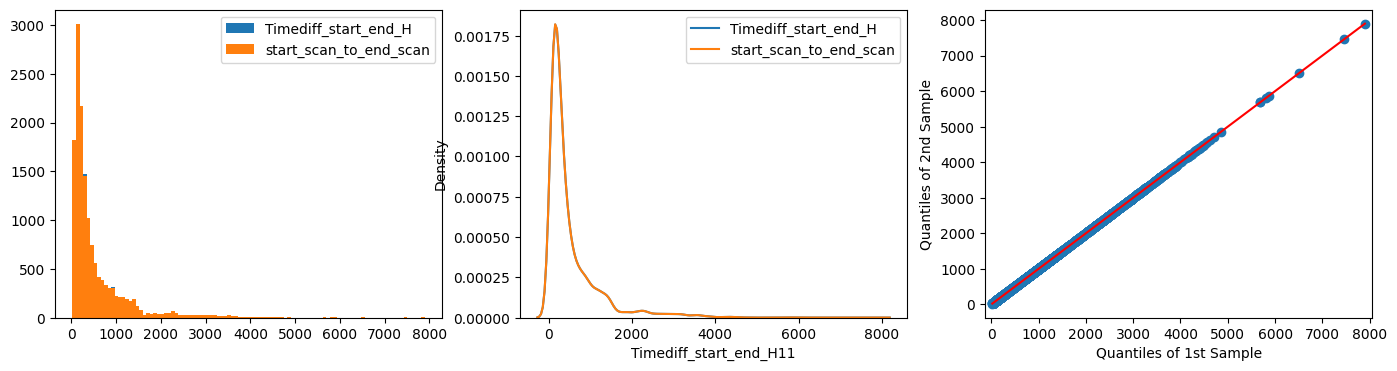

In [81]:
plt.figure(figsize=(17,4))
plt.subplot(131)
plt.hist(data_final['Timediff_start_end_H11'],bins=100,label='Timediff_start_end_H')
plt.hist(data_final['start_scan_to_end_scan11'],bins=100,label='start_scan_to_end_scan')
plt.legend()
plt.subplot(132)
sns.kdeplot(data_final['Timediff_start_end_H11'],label='Timediff_start_end_H')
sns.kdeplot(data_final['start_scan_to_end_scan11'],label='start_scan_to_end_scan')
plt.legend()
# Quantile-Quantile plot for 2samples
qqplot_2samples(data_final['Timediff_start_end_H11'], data_final['start_scan_to_end_scan11'], line="r", ax=plt.subplot(133))
plt.show()

**Step-1: Defining Null & Alternate Hypothesis**

H0 : The mean for Timediff_start_end_H & start_scan_to_end_scan are same

Ha : The mean for start_scan_to_end_scan and start_scan_to_end_scan are difference.

**Step-2: Choosing Appropriate test**

Here we are using Two Sample T-Test

**Step-3: Choosing Significance level**

Here we are aiming for 95% confidence, hence alpha=0.05

**Step-4: Perform the test and determine the pvalue**


In [82]:
import scipy.stats as stats
t_stat,p_value = stats.ttest_ind(data_final['Timediff_start_end_H11'],data_final['start_scan_to_end_scan11'],alternative="two-sided")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
print('P_value One_side :',(p_value/2))

if p_value < 0.05:
    print('Reject NULL HYPOTHESIS')
else:
    print('Fail to Reject NULL HYPOTHESIS')

t_stat :  0.11551867533202027
p_value :  0.9080348031420551
P_value One_side : 0.45401740157102755
Fail to Reject NULL HYPOTHESIS


###The pvalue is not less than alpha, hence the mean between Timediff_start_end_H11 and start_scan_to_end_scan11 are same.

##Comparision Between Aggregate Actual time & Aggregate OSRM Time

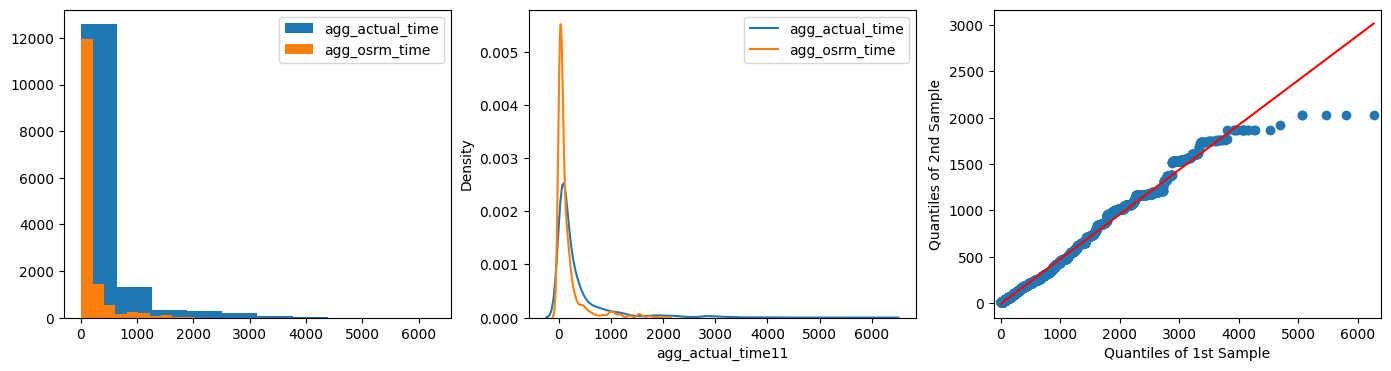

In [83]:
plt.figure(figsize=(17,4))
plt.subplot(131)
plt.hist(data_final['agg_actual_time11'],bins=10,label='agg_actual_time')
plt.hist(data_final['agg_osrm_time11'],bins=10,label='agg_osrm_time')
plt.legend()
plt.subplot(132)
sns.kdeplot(data_final['agg_actual_time11'],label='agg_actual_time')
sns.kdeplot(data_final['agg_osrm_time11'],label='agg_osrm_time')
plt.legend()
# Quantile-Quantile plot for 2samples
qqplot_2samples(data_final['agg_actual_time11'],data_final['agg_osrm_time11'], line="r", ax=plt.subplot(133))
plt.show()

**Step-1: Defining Null & Alternate Hypothesis**

H0 : The mean for agg_actual_time & agg_osrm_time are same

Ha : The mean for agg_actual_time and agg_osrm_time are difference.

**Step-2: Choosing Appropriate test**

Here we are using Two Sample T-Test

**Step-3: Choosing Significance level**

Here we are aiming for 95% confidence, hence alpha=0.05

**Step-4: Perform the test and determine the pvalue**

In [84]:
import scipy.stats as stats
t_stat,p_value = stats.ttest_ind(data_final['agg_actual_time11'],data_final['agg_osrm_time11'])
print('t_stat :', t_stat)
print('P-value :', p_value)
if p_value < 0.05:
    print('Reject NULL HYPOTHESIS')
else:
    print('Fail to Reject NULL HYPOTHESIS')

t_stat : 37.924611689639825
P-value : 2.358932823082838e-307
Reject NULL HYPOTHESIS


###The pvalue is less than alpha, hence the mean between agg_actual_time11 and agg_osrm_time11 are not same.

In [68]:
#####################################################################

##Comparision Between Aggregate Actual time & Aggregate segment_actual_time



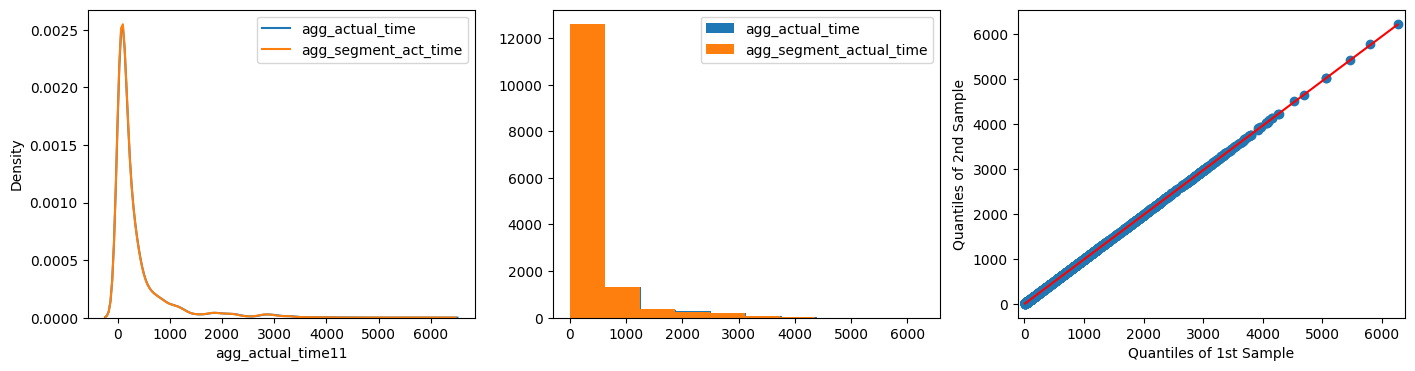

In [85]:
plt.figure(figsize=(17,4))
plt.subplot(131)
sns.kdeplot(data_final['agg_actual_time11'],label='agg_actual_time')
sns.kdeplot(data_final['agg_segment_actual_time11'],label='agg_segment_act_time')
plt.legend()
plt.subplot(132)
plt.hist(data_final['agg_actual_time11'],bins=10,label='agg_actual_time')
plt.hist(data_final['agg_segment_actual_time11'],bins=10,label='agg_segment_actual_time')
plt.legend()
# Quantile-Quantile plot for 2samples
qqplot_2samples(data_final['agg_actual_time11'],data_final['agg_segment_actual_time11'], line="r", ax=plt.subplot(133))
plt.show()

Step-1: Defining Null & Alternate Hypothesis

H0 : The mean for agg_Actual_time & agg_segment_actual_time are same

Ha : The mean for agg_Actual_time and agg_segment_actual_time are difference.

Step-2: Choosing Appropriate test

Here we are using Two Sample T-Test

Step-3: Choosing Significance level

Here we are aiming for 95% confidence, hence alpha=0.05

Step-4: Perform the test and determine the pvalue

In [86]:
t_stat,p_value = stats.ttest_ind(data_final['agg_actual_time11'],data_final['agg_segment_actual_time11'])
print('t_stat :', t_stat)
print('P-value :',(p_value))

if p_value < 0.05:
    print('Reject NULL HYPOTHESIS')
else:
    print('Fail to Reject NULL HYPOTHESIS')

t_stat : 0.4978641813349065
P-value : 0.6185834771383849
Fail to Reject NULL HYPOTHESIS


###The pvalue is not less than alpha, hence the mean between agg_actual_time11 and agg_segment_actual_time11 are same.

In [71]:
################################################################################################

##Comparision Between Aggregate OSRM distance & Aggregate Segment osrm distance

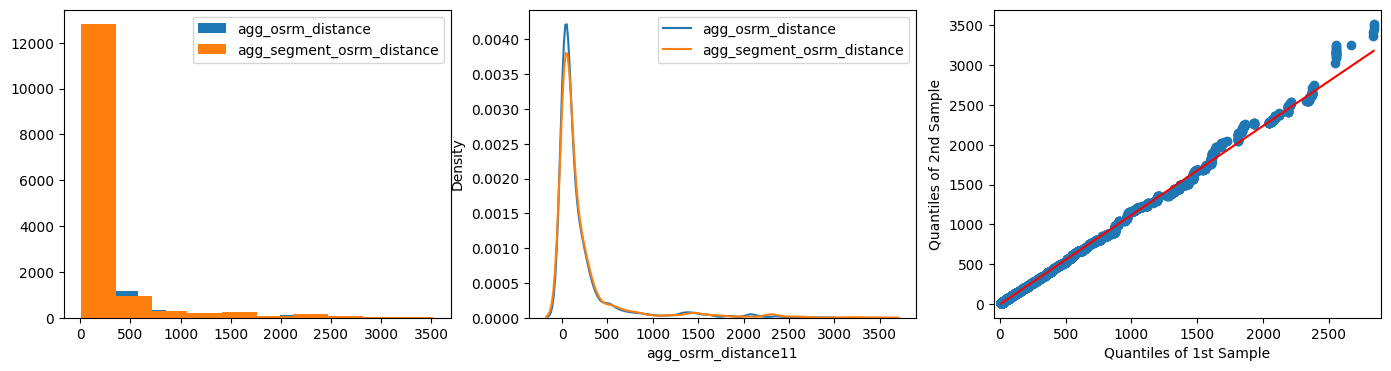

In [87]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
plt.hist(data_final['agg_osrm_distance11'],bins=10,label='agg_osrm_distance')
plt.hist(data_final['agg_segment_osrm_distance11'],bins=10,label='agg_segment_osrm_distance')
plt.legend()
plt.subplot(1,3,2)
sns.kdeplot(data_final['agg_osrm_distance11'],label='agg_osrm_distance')
sns.kdeplot(data_final['agg_segment_osrm_distance11'],label='agg_segment_osrm_distance')
plt.legend()
# Quantile-Quantile plot for 2samples
qqplot_2samples(data_final['agg_osrm_distance11'],data_final['agg_segment_osrm_distance11'], line="r", ax=plt.subplot(133))
plt.show()

**Step-1: Defining Null & Alternate Hypothesis**

H0 : The mean for Agg_osrm_distance & agg_segment_osrm_distance are same

Ha : The mean for Agg_osrm_distance and agg_segment_osrm_distance are difference.

**Step-2: Choosing Appropriate test**

Here we are using Two Sample T-Test

**Step-3: Choosing Significance level**

Here we are aiming for 95% confidence, hence alpha=0.05

**Step-4: Perform the test and determine the pvalue**

In [88]:
import scipy.stats as stats
t_stat,p_value = stats.ttest_ind(data_final['agg_osrm_distance11'],data_final['agg_segment_osrm_distance11'])
print('t_stat :', t_stat)
print('P-value :',(p_value))

if p_value < 0.05:
    print('Reject NULL HYPOTHESIS')
else:
    print('Fail to Reject NULL HYPOTHESIS')

t_stat : -3.9379741183399783
P-value : 8.236076174381012e-05
Reject NULL HYPOTHESIS


###The pvalue is less than alpha, hence the mean between agg_osrm_distance11 and agg_segment_osrm_distance11 are not same.

In [74]:
#############################################################################################3

## Comparision Between Aggregate OSRM time & Aggregate Segment OSRM Time

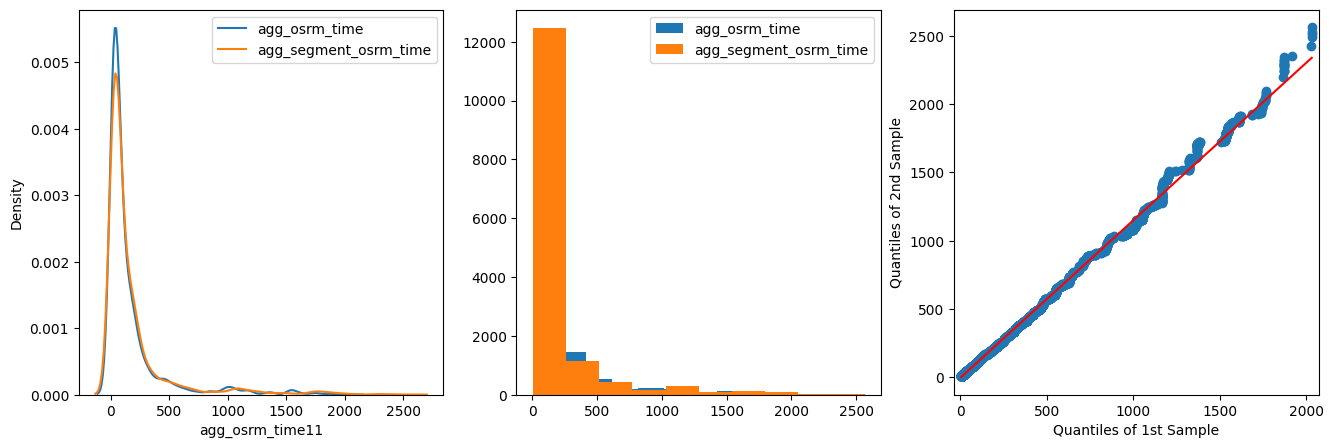

In [89]:
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.kdeplot(data_final['agg_osrm_time11'],label='agg_osrm_time')
sns.kdeplot(data_final['agg_segment_osrm_time11'],label='agg_segment_osrm_time')
plt.legend()
plt.subplot(132)
plt.hist(data_final['agg_osrm_time11'],bins=10,label='agg_osrm_time')
plt.hist(data_final['agg_segment_osrm_time11'],bins=10,label='agg_segment_osrm_time')
plt.legend()
# Quantile-Quantile plot for 2samples
qqplot_2samples(data_final['agg_osrm_time11'],data_final['agg_segment_osrm_time11'], line="r", ax=plt.subplot(133))
plt.show()

**Step-1: Defining Null & Alternate Hypothesis**

H0 : The mean for Agg_osrm_distance & agg_segment_osrm_distance are same

Ha : The mean for Agg_osrm_distance and agg_segment_osrm_distance are difference.

**Step-2: Choosing Appropriate test**

Here we are using Two Sample T-Test

**Step-3: Choosing Significance level**

Here we are aiming for 95% confidence, hence alpha=0.05

**Step-4: Perform the test and determine the pvalue**

In [90]:
import scipy.stats as stats
t_stat,p_value = stats.ttest_ind(data_final['agg_osrm_time11'],data_final['agg_segment_osrm_time11'])
print('t_stat :', t_stat)
print('P-value :', p_value)
if p_value < 0.05:
    print('Reject NULL HYPOTHESIS')
else:
    print('Fail to Reject NULL HYPOTHESIS')

t_stat : -5.505522067054686
P-value : 3.711314386305602e-08
Reject NULL HYPOTHESIS


###The pvalue is less than alpha, hence the mean between agg_osrm_time11 and agg_segment_osrm_time11 are not same.

In [77]:
#######################################################3

#**Exploratory Data Analysis**

##**Univariate Data Analysis**

In [92]:
num_cols = data_final.select_dtypes('float64').columns.values
cat_cols = data_final.select_dtypes('object').columns.values

##############
start_scan_to_end_scan11
148.0     51
115.0     51
87.0      50
113.0     49
128.0     49
          ..
1895.0     1
1634.0     1
1199.0     1
1205.0     1
2429.0     1
Name: count, Length: 2203, dtype: int64


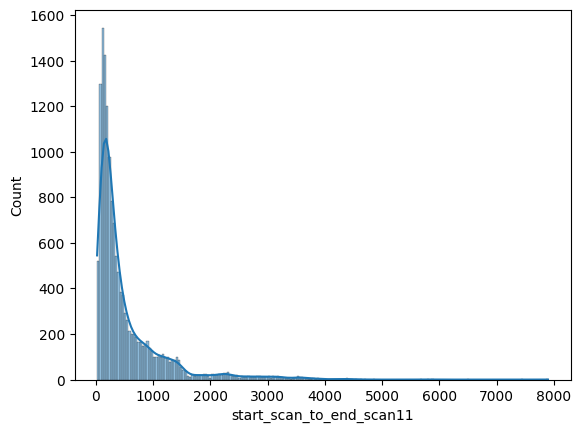

##############
Timediff_start_end_H11
319.61     4
286.63     4
122.43     4
147.10     4
86.20      4
          ..
227.87     1
924.06     1
658.28     1
3732.37    1
427.69     1
Name: count, Length: 13573, dtype: int64


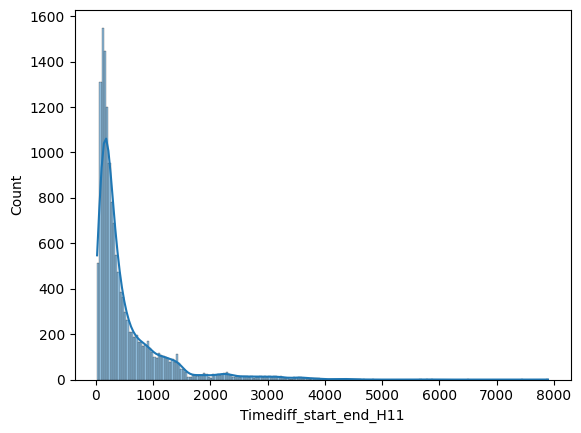

##############
agg_segment_actual_time11
47.0      121
41.0      112
60.0      107
35.0      100
55.0      100
         ... 
1120.0      1
1684.0      1
2862.0      1
2662.0      1
2750.0      1
Name: count, Length: 1885, dtype: int64


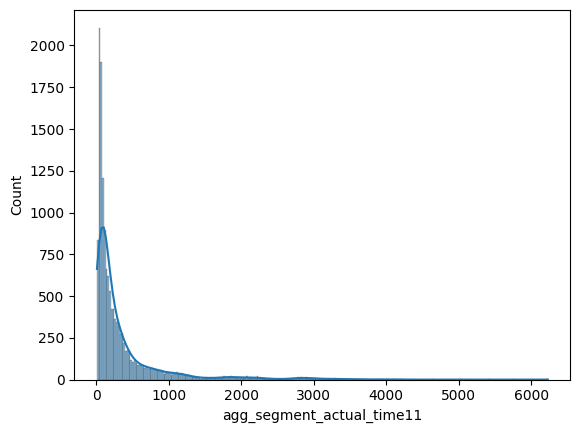

##############
agg_segment_osrm_time11
17.0      221
20.0      213
19.0      210
18.0      209
22.0      208
         ... 
1845.0      1
2422.0      1
938.0       1
1185.0      1
1723.0      1
Name: count, Length: 1240, dtype: int64


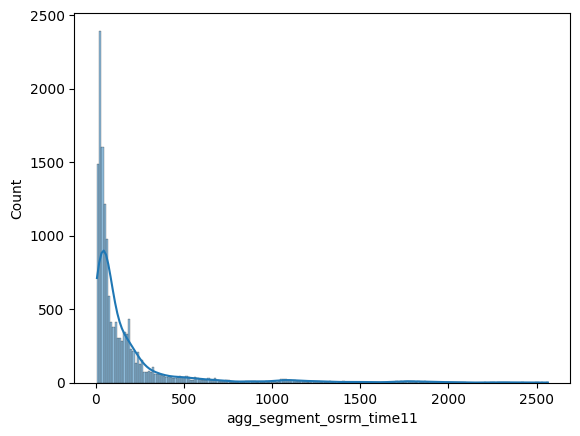

##############
agg_segment_osrm_distance11
42.2424     2
139.9819    2
27.5998     2
27.6689     2
53.1450     2
           ..
33.1927     1
120.2104    1
234.5058    1
213.8828    1
131.1238    1
Name: count, Length: 14724, dtype: int64


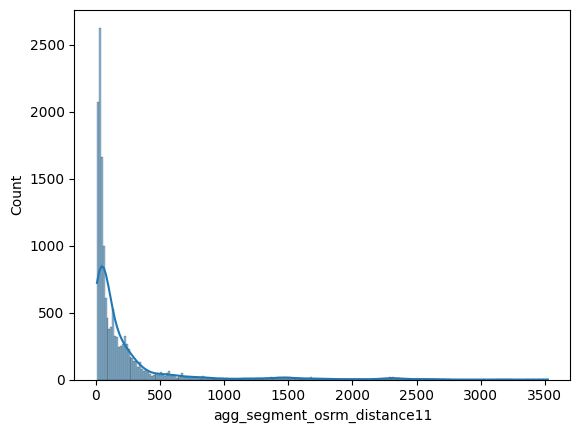

##############
agg_distance_to_destination11
32.177092     2
27.959967     2
18.036366     2
25.878761     2
195.585266    2
             ..
176.696070    1
187.836591    1
167.384229    1
31.552168     1
73.680667     1
Name: count, Length: 14771, dtype: int64


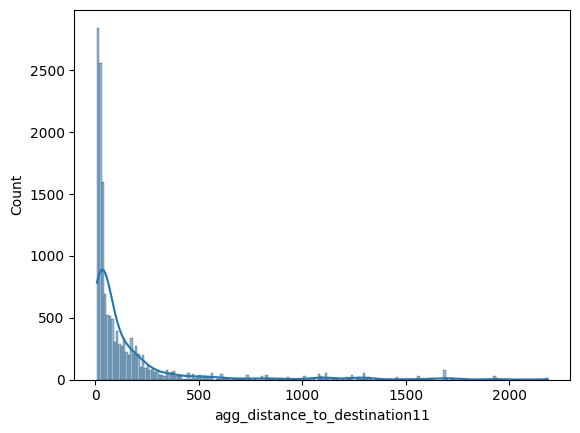

##############
agg_actual_time11
60.0      134
50.0      130
42.0      121
48.0      115
38.0      111
         ... 
966.0       1
2817.0      1
2331.0      1
2379.0      1
2784.0      1
Name: count, Length: 1851, dtype: int64


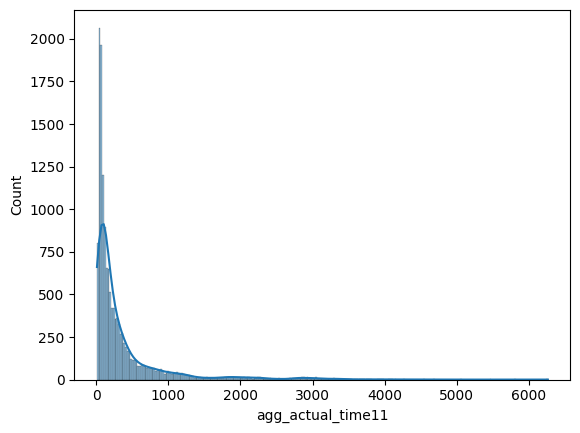

##############
agg_osrm_time11
20.0      265
34.0      265
29.0      254
23.0      239
32.0      235
         ... 
967.0       1
1087.0      1
782.0       1
1744.0      1
702.0       1
Name: count, Length: 827, dtype: int64


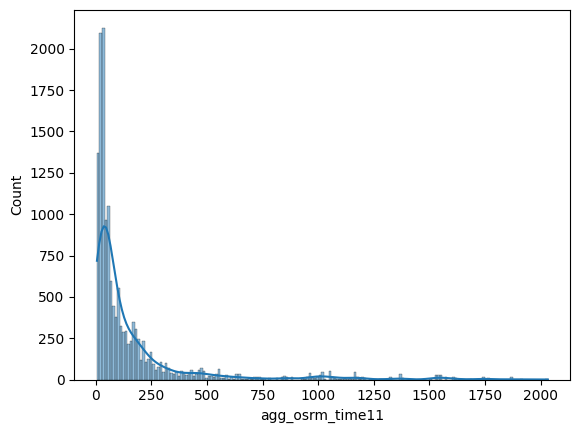

##############
agg_osrm_distance11
15.8695     2
42.3121     2
53.3295     2
61.0186     2
37.0811     2
           ..
150.0793    1
44.1600     1
103.9523    1
267.3213    1
111.2709    1
Name: count, Length: 14706, dtype: int64


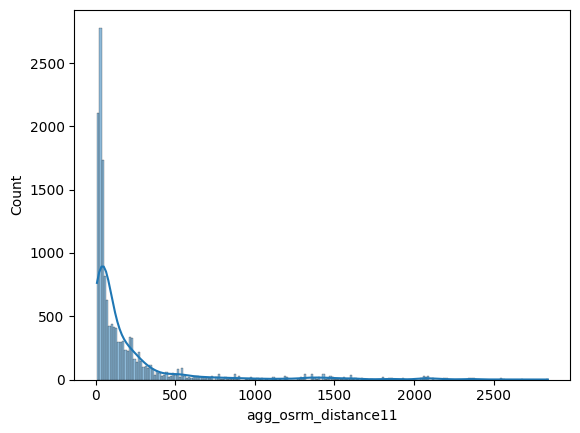

In [93]:
for i in num_cols:
    print('##############')
    print(data_final[i].value_counts())
    sns.histplot(data_final[i],kde=True)
    plt.show()



*   The data's are heavily right skewed.



In [94]:
for i in cat_cols:
    print('##############')
    print(data_final[i].value_counts())

##############
route_type
Carting    8906
FTL        5881
Name: count, dtype: int64
##############
trip_uuid
trip-153741093647649320    1
trip-153836648611826977    1
trip-153681920064110379    1
trip-153744931166370622    1
trip-153764628243892763    1
                          ..
trip-153741177166786003    1
trip-153801210039247977    1
trip-153737819969505360    1
trip-153739632610417618    1
trip-153746066843555182    1
Name: count, Length: 14787, dtype: int64
##############
Source_City11
Bengaluru                1014
Gurgaon                  1011
Bhiwandi                  811
Bangalore                 731
Delhi                     617
                         ... 
Parvathipuram_Central       1
Koraput                     1
Jasai                       1
Baripada                    1
Ashta                       1
Name: count, Length: 706, dtype: int64
##############
Source_Place11
Bilaspur            959
Mankoli             811
Nelmngla            732
H                   643
I      

## Busiest Route

In [95]:
data_copy_grouped.head()

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671041653548748,IND209304AAA,IND000000ACB,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
1,trip-153671041653548748,IND462022AAA,IND209304AAA,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
2,trip-153671042288605164,IND561203AAB,IND562101AAA,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,trip-153671042288605164,IND572101AAA,IND561203AAB,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4,trip-153671043369099517,IND000000ACB,IND160002AAC,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [96]:
data_copy_grouped.route_type.max()

81

In [97]:
# find trip uuid of max count
data_copy_grouped[data_copy_grouped['route_type']==81]

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
12201,trip-153755502932196495,IND160002AAC,IND562132AAA,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81


In [98]:
data[data['trip_uuid']=='trip-153755502932196495']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
61008,training,2018-09-21 18:37:09.322207,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153755502932196495,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,3802.0,True,22,2018-09-24 08:45:18,22.574426,61.0,33.0,30.9712,1.848485,61.0,33.0,30.9712,1.848485
61009,training,2018-09-21 18:37:09.322207,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153755502932196495,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,3802.0,True,176,2018-09-24 05:09:10,188.713089,277.0,190.0,215.9518,1.457895,216.0,157.0,184.9805,1.375796
61010,training,2018-09-21 18:37:09.322207,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153755502932196495,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,3802.0,True,198,2018-09-24 04:57:15,200.615452,289.0,199.0,228.2893,1.452261,11.0,8.0,12.3376,1.375000
61011,training,2018-09-21 18:37:09.322207,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153755502932196495,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,3802.0,True,220,2018-09-24 04:33:11,223.377051,313.0,216.0,253.0804,1.449074,24.0,17.0,24.7911,1.411765
61012,training,2018-09-21 18:37:09.322207,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153755502932196495,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,3802.0,True,242,2018-09-24 04:09:00,246.271125,338.0,235.0,280.2487,1.438298,24.0,19.0,27.1683,1.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61084,training,2018-09-21 18:37:09.322207,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153755502932196495,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,3802.0,True,1848,2018-09-21 23:18:30,1853.249750,3508.0,1629.0,2245.3849,2.153468,23.0,24.0,28.0373,0.958333
61085,training,2018-09-21 18:37:09.322207,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153755502932196495,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,3802.0,True,1870,2018-09-21 22:54:27,1876.975233,3532.0,1650.0,2275.5970,2.140606,24.0,21.0,30.2121,1.142857
61086,training,2018-09-21 18:37:09.322207,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153755502932196495,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,3802.0,True,1892,2018-09-21 22:30:28,1901.686641,3556.0,1664.0,2294.8983,2.137019,23.0,20.0,26.0819,1.150000
61087,training,2018-09-21 18:37:09.322207,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153755502932196495,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,3802.0,True,1914,2018-09-21 22:06:28,1924.221719,3580.0,1682.0,2319.9344,2.128419,24.0,17.0,25.0360,1.411765


In [99]:
data_final[data_final['trip_uuid']=='trip-153755502932196495'][['agg_segment_actual_time11',
       'agg_segment_osrm_time11', 'agg_segment_osrm_distance11',
       'agg_distance_to_destination11', 'agg_actual_time11', 'agg_osrm_time11']]

,agg_segment_actual_time11,agg_segment_osrm_time11,agg_segment_osrm_distance11,agg_distance_to_destination11,agg_actual_time11,agg_osrm_time11
61008,3751.0,1864.0,2500.2145,1927.447705,3784.0,1686.0


###Bussiest Route is from source Chandigarh_Mehmdpur_H (Punjab) to Bangalore_Nelmngla_H (Karnataka) Average_distance between them is 1927 kms & average time taken is 3784 mins

In [100]:
temp=['start_scan_to_end_scan11',
       'trip_creation_day', 'Timediff_start_end_H11', 'agg_segment_actual_time11',
       'agg_segment_osrm_time11', 'agg_segment_osrm_distance11',
       'agg_distance_to_destination11', 'agg_actual_time11', 'agg_osrm_time11',
       'agg_osrm_distance11']

In [101]:
temp

['start_scan_to_end_scan11',
 'trip_creation_day',
 'Timediff_start_end_H11',
 'agg_segment_actual_time11',
 'agg_segment_osrm_time11',
 'agg_segment_osrm_distance11',
 'agg_distance_to_destination11',
 'agg_actual_time11',
 'agg_osrm_time11',
 'agg_osrm_distance11']

##Data Visualization

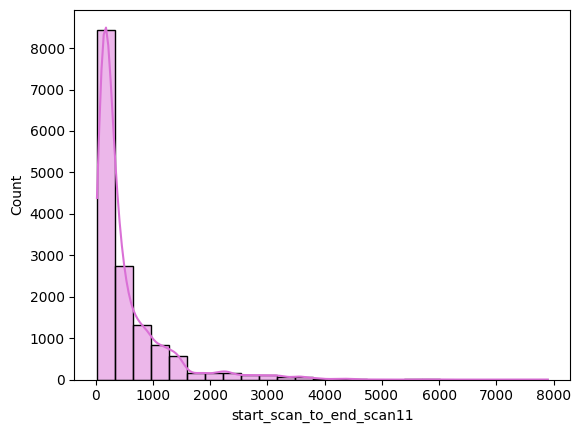

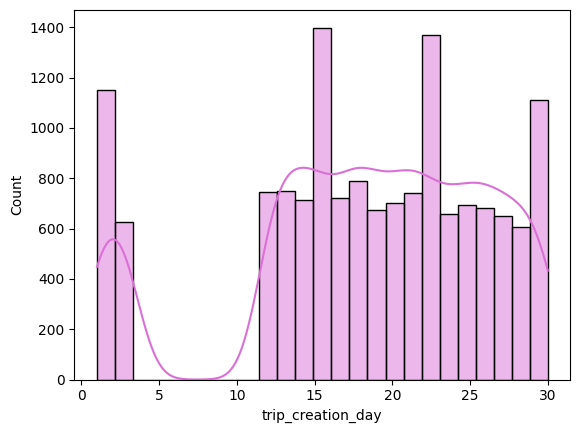

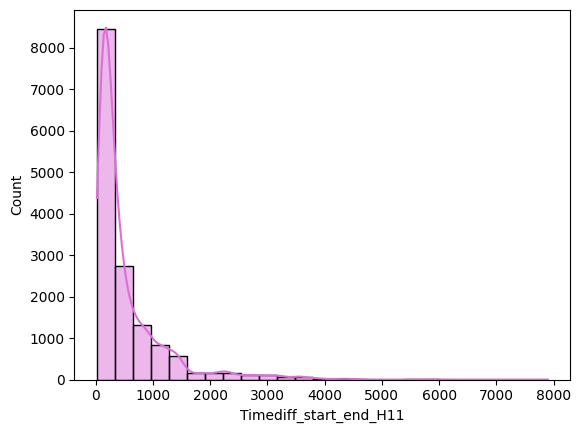

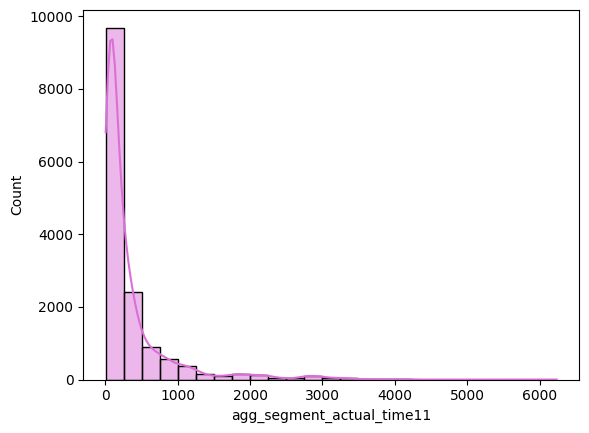

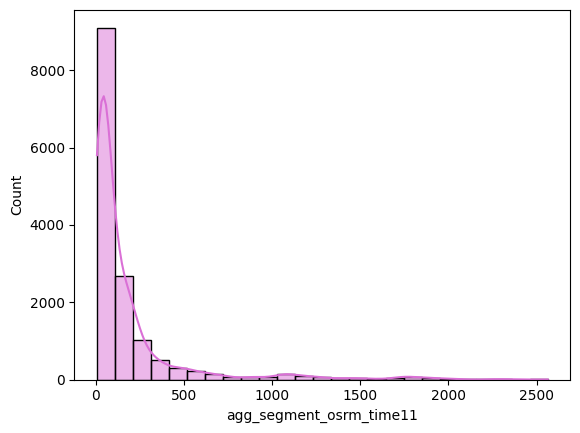

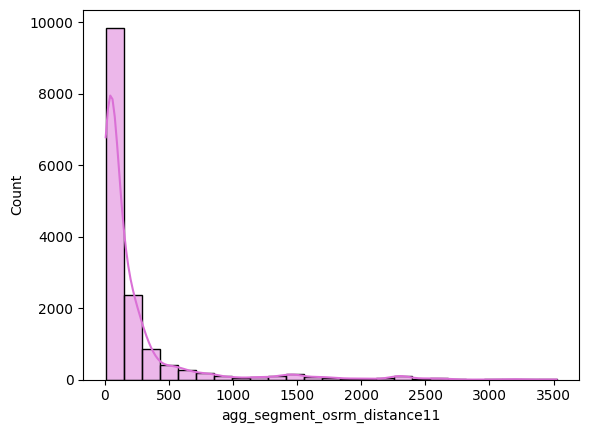

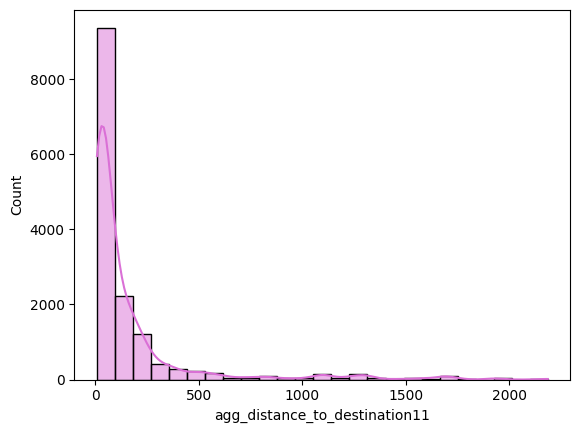

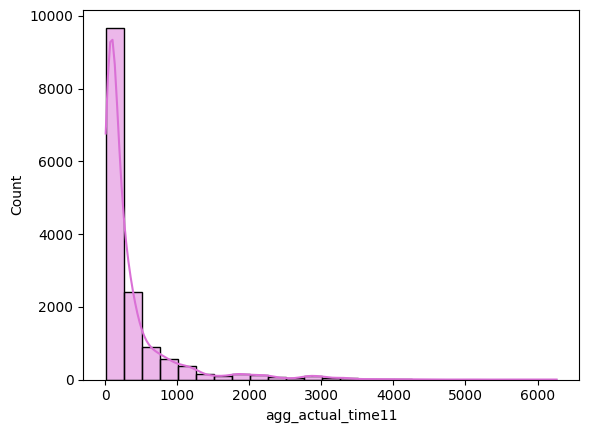

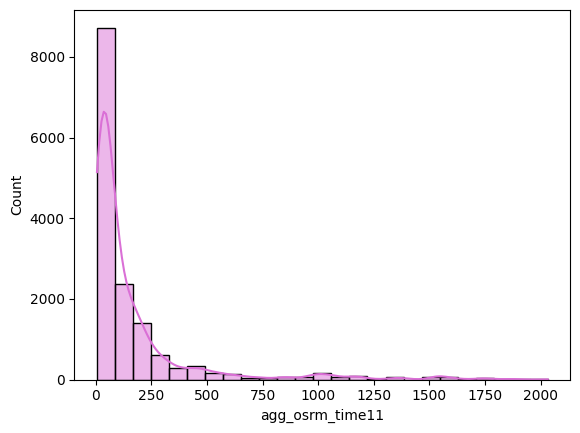

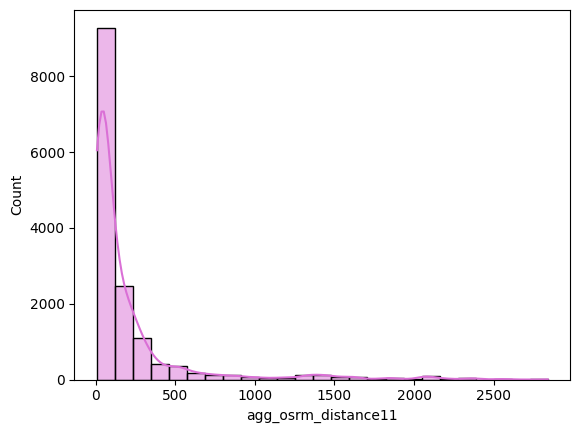

In [102]:
for i in temp:
  sns.histplot(data_final[i], bins=25, kde=True, color='orchid')
  plt.show()

## Outlier Detection & their Treatment

In [103]:
def uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,3))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})

    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [104]:
num_cols = data.select_dtypes('float64').columns.values

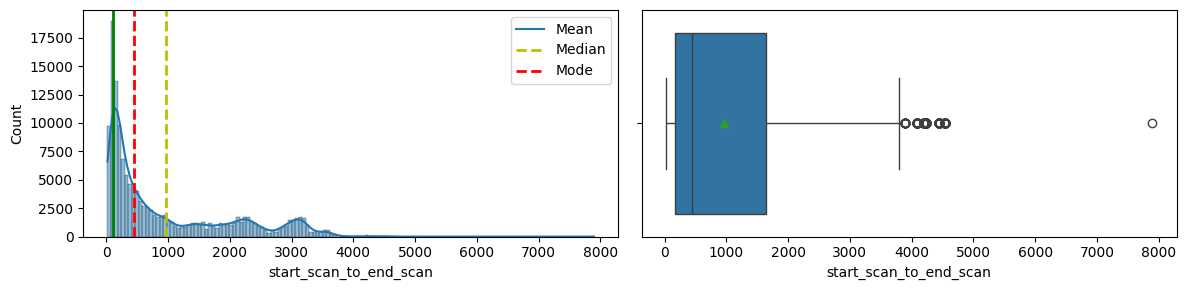

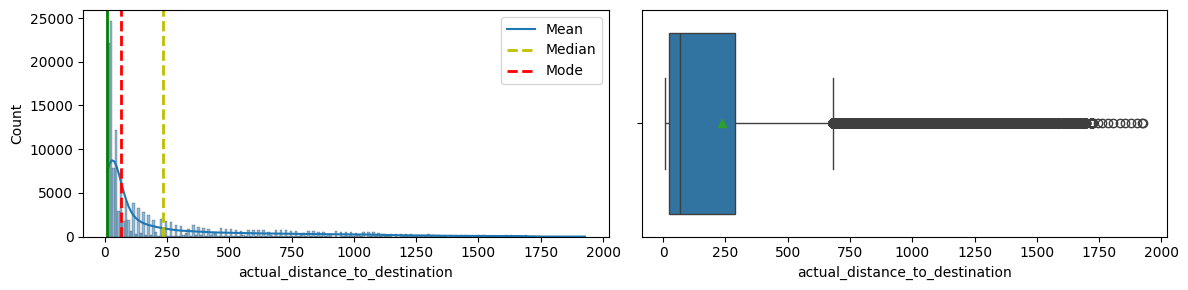

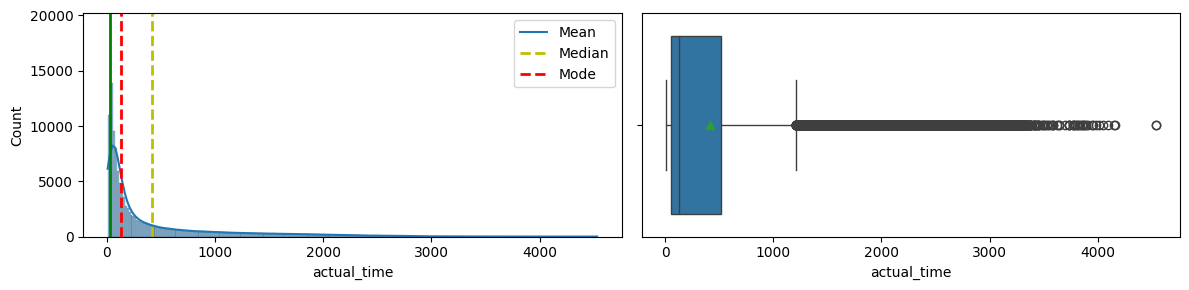

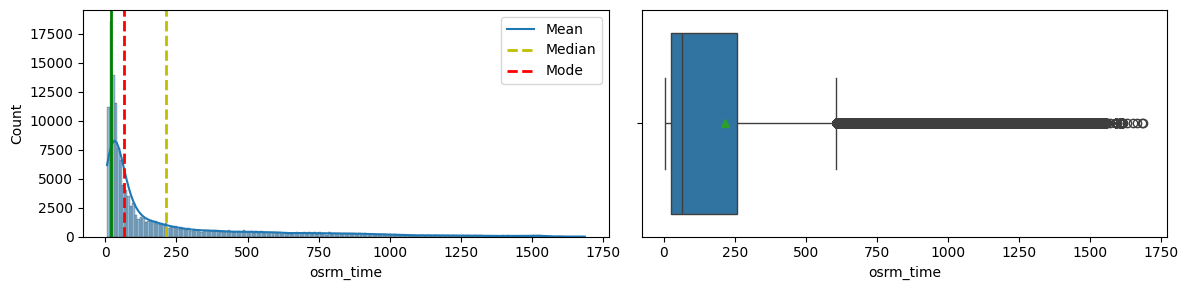

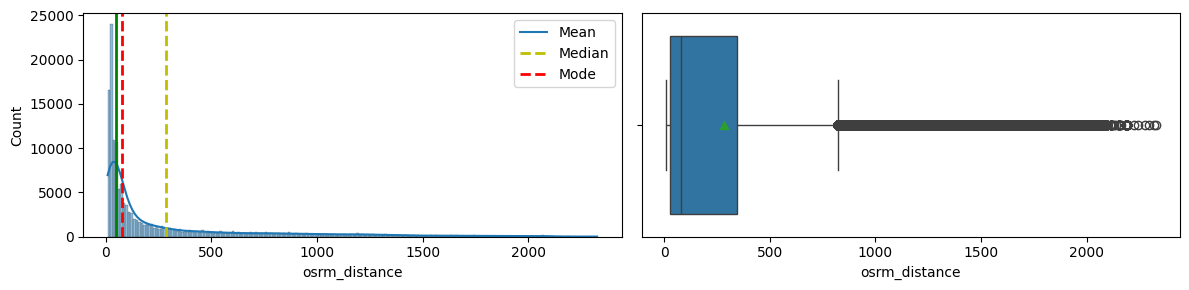

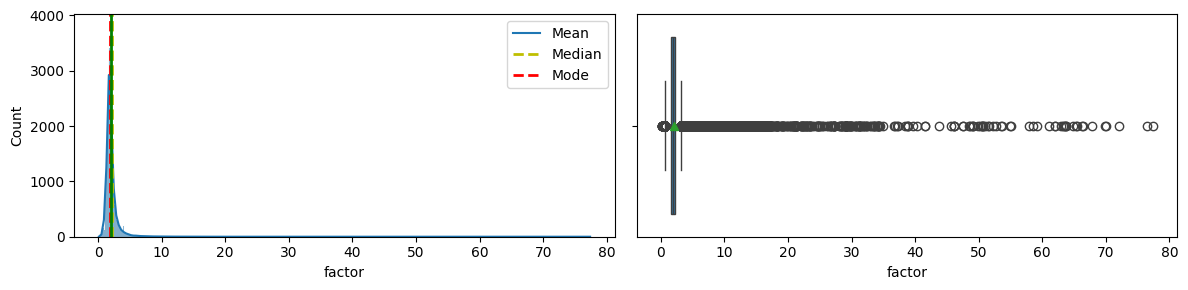

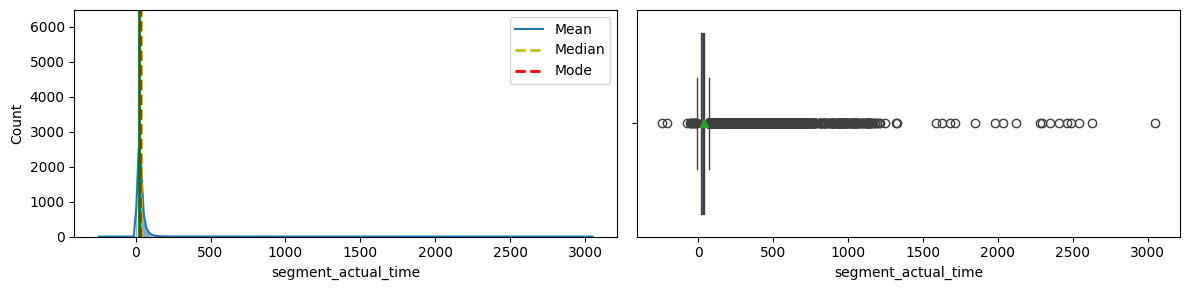

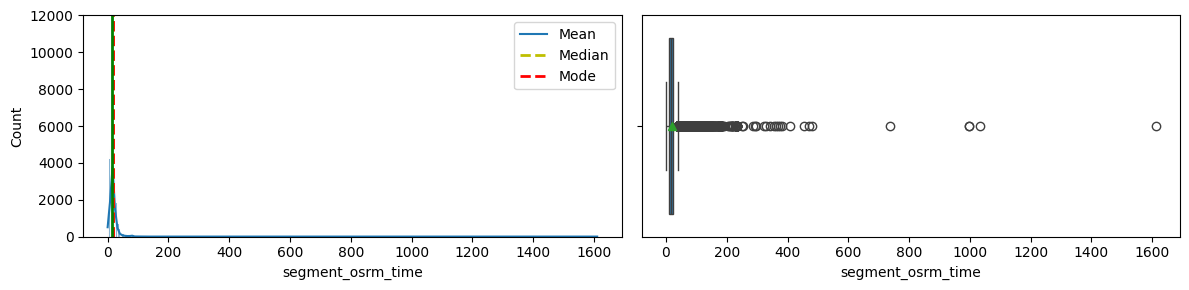

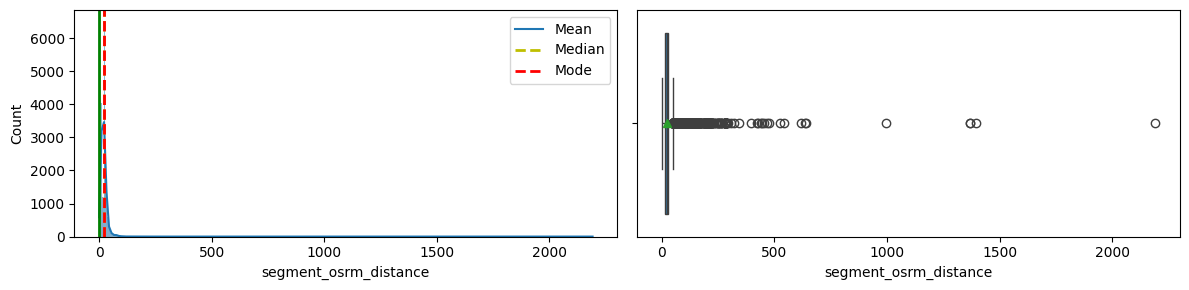

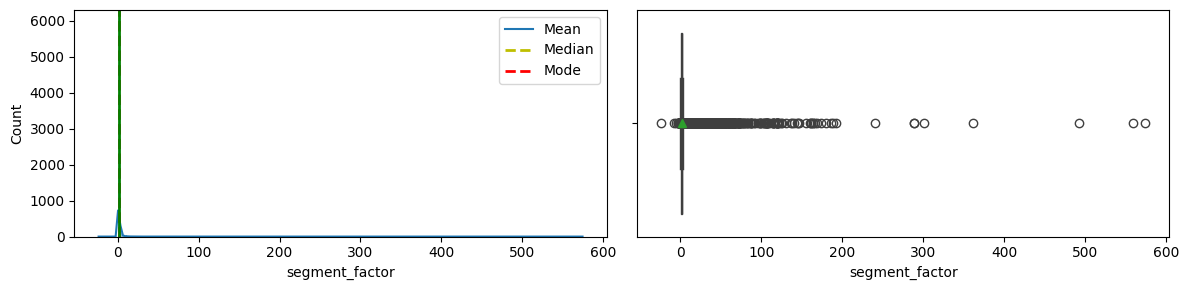

In [105]:
for f in num_cols:
    uni(data[f])
plt.show()

In [106]:
#treating outliers:
def treat_outlier(variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1,q3=np.percentile(variable,[25,75])
    iqr = q3-q1
    lo_range = q1-(1.5*iqr)
    up_range = q3+(1.5*iqr)
    return lo_range,up_range

In [107]:
for col in num_cols:
    ir,ur=treat_outlier(data[col])
    data[col]=np.where(data[col]>ur,ur,data[col])
    data[col]=np.where(data[col]<ir,ir,data[col])

Here I have found the outliers and replaced them with max and min of whisker's value.

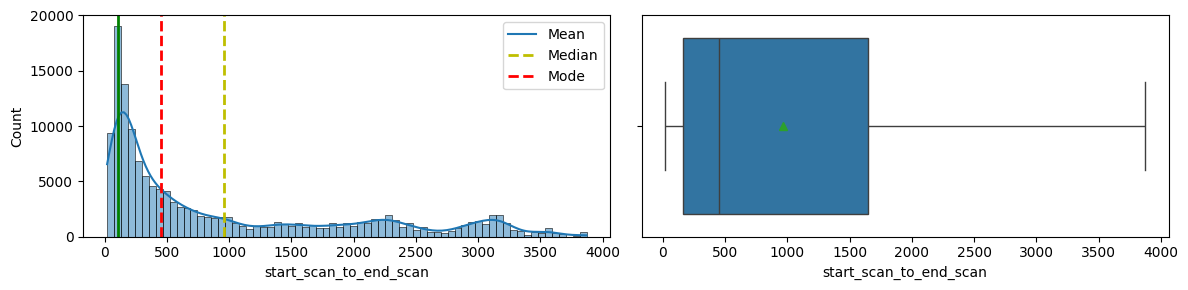

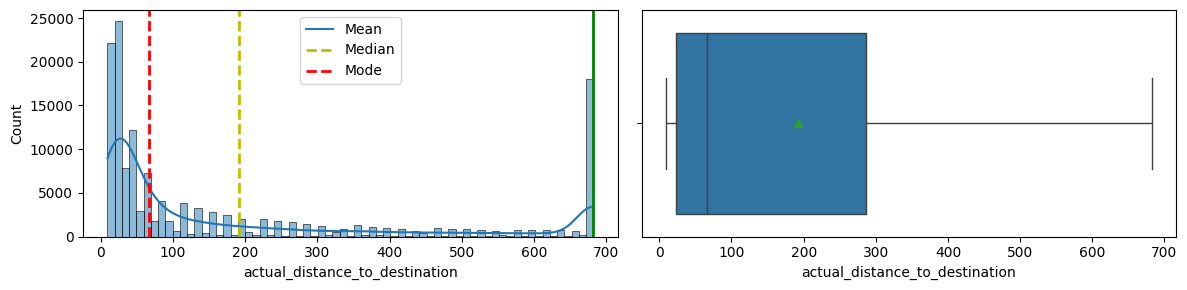

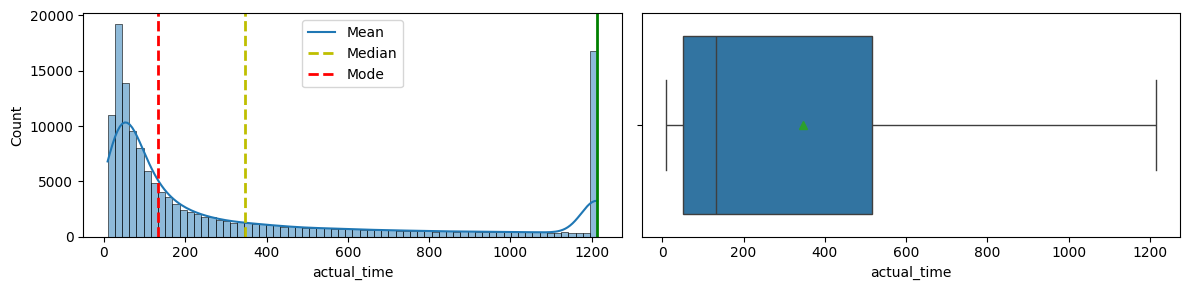

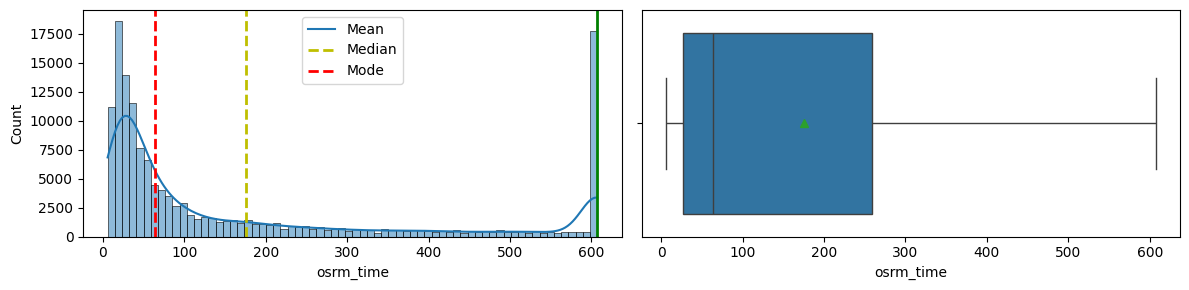

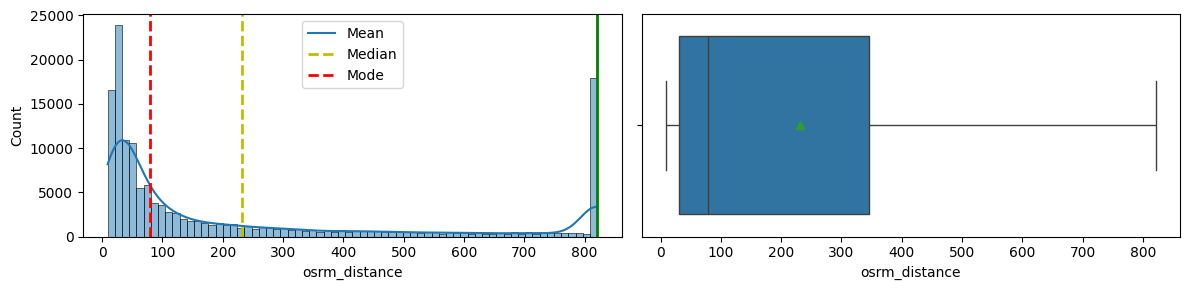

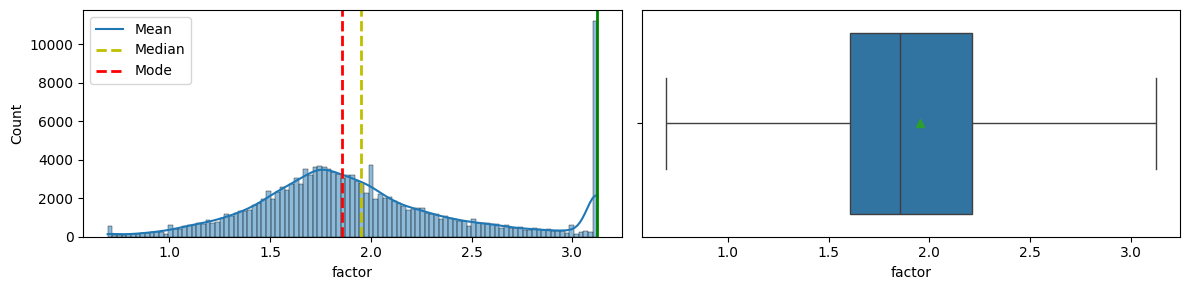

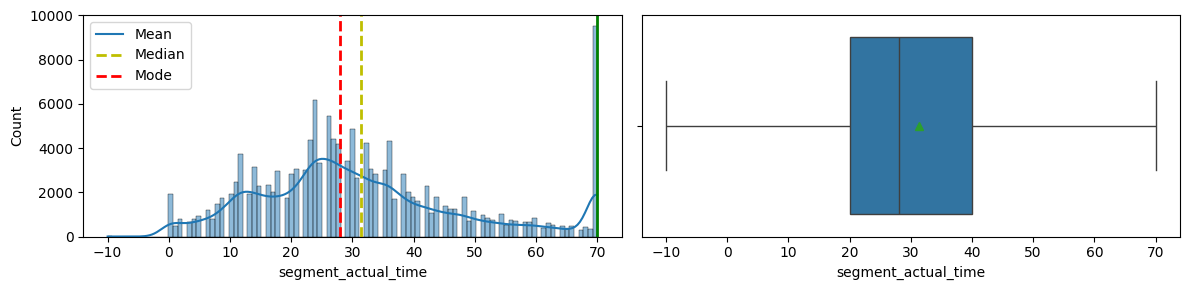

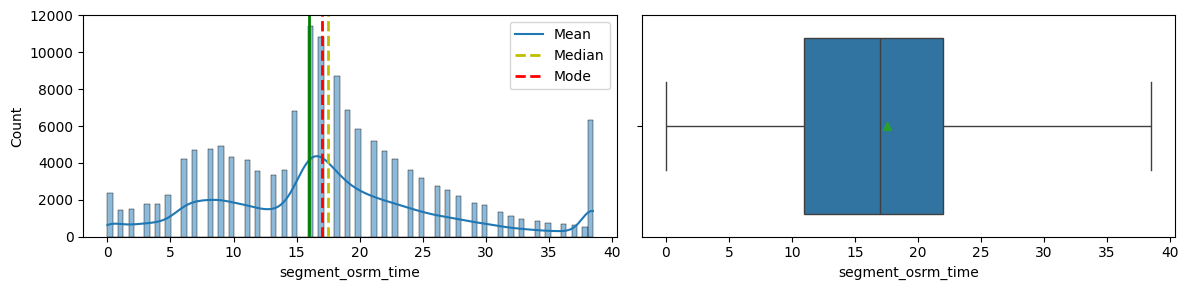

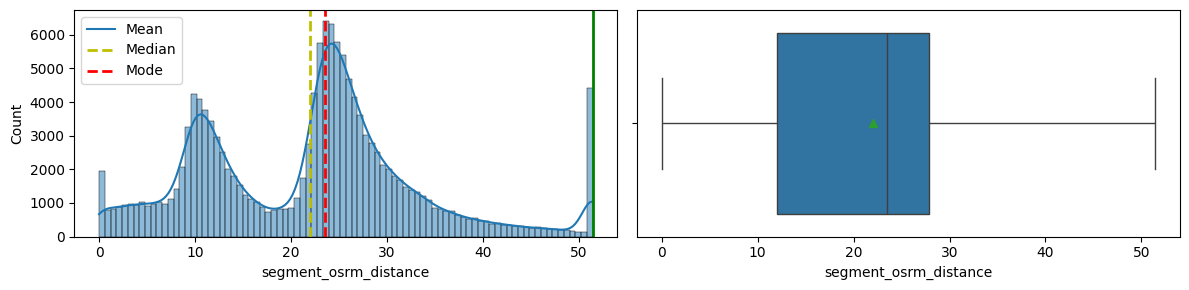

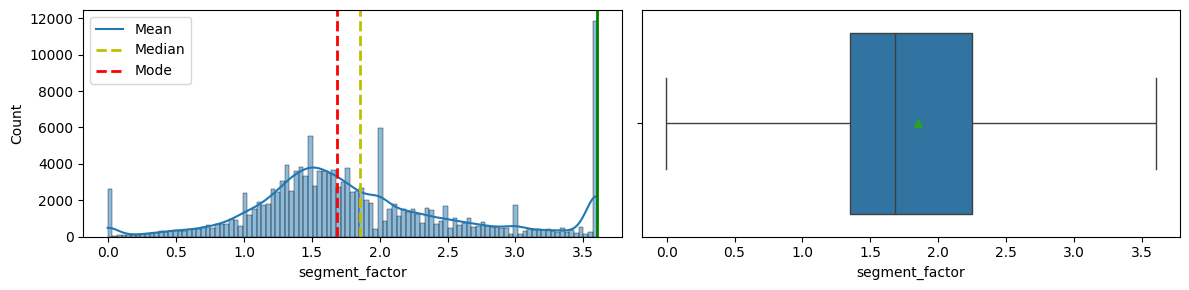

In [108]:
#Lets check where outliers are removed or not:
for f in num_cols:
    uni(data[f])
plt.show()


*   **The outliers are removed**



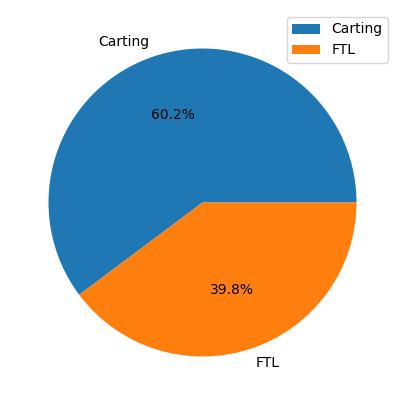

In [109]:
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(data_final['route_type'].value_counts(), labels=data_final['route_type'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()


*   **Therefore by  analyzing the given data, it has been found that 60% of the route type used for delivery were Carting and the remaining were FTL.**

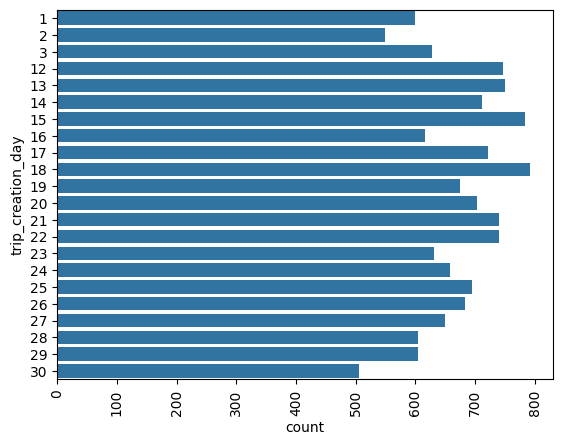

In [110]:
sns.countplot(y=data_final['trip_creation_day'])
plt.xticks(rotation=90)
plt.show()



*   The start and end date of the months the trips were lesser.
*   More trips were during mid of the month, but there is not huge diiference. The trips were similar across the month.
*   No trips were found from 4th till 11th of the month.






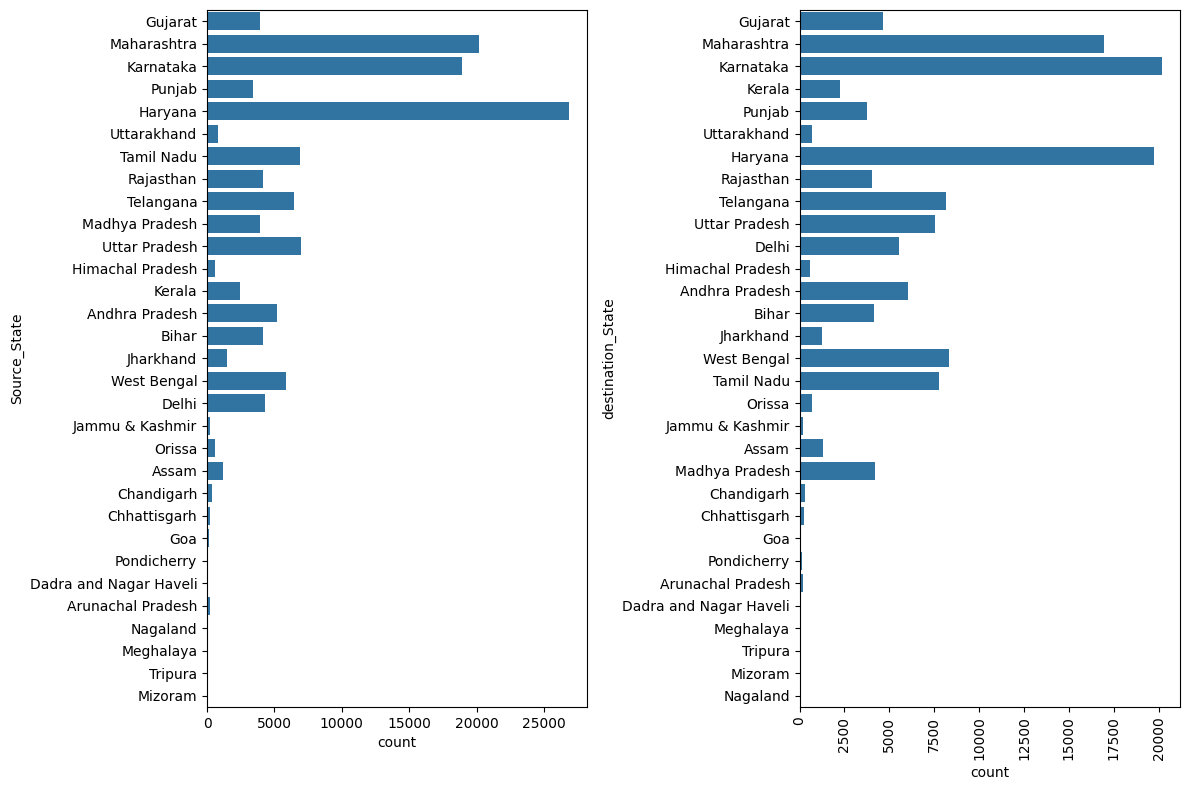

In [111]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.countplot(y=data_copy['Source_State'],ax=ax[0])
sns.countplot(y=data_copy['destination_State'],ax=ax[1])

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



*   The top 3 states that contributes to overall trips were Haryana, Maharastra and Karnataka.



##**Bivariate Analysis**

Since most of the features were numerical, instead of using other plots I have used heatmap to know the overall relation between each features

In [112]:
rel=data_final.loc[:,['route_type', 'trip_uuid',
       'start_scan_to_end_scan11', 'trip_creation_month',
       'trip_creation_day', 'Timediff_start_end_H11', 'agg_segment_actual_time11',
       'agg_segment_osrm_time11', 'agg_segment_osrm_distance11',
       'agg_distance_to_destination11', 'agg_actual_time11', 'agg_osrm_time11',
       'agg_osrm_distance11', 'Source_City11', 'Source_Place11', 'Source_Code/State11',
       'destination_City11', 'destination_Place11', 'destination_Code/State11']]

In [113]:
rel.columns

Index(['route_type', 'trip_uuid', 'start_scan_to_end_scan11',
       'trip_creation_month', 'trip_creation_day', 'Timediff_start_end_H11',
       'agg_segment_actual_time11', 'agg_segment_osrm_time11',
       'agg_segment_osrm_distance11', 'agg_distance_to_destination11',
       'agg_actual_time11', 'agg_osrm_time11', 'agg_osrm_distance11',
       'Source_City11', 'Source_Place11', 'Source_Code/State11',
       'destination_City11', 'destination_Place11',
       'destination_Code/State11'],
      dtype='object')

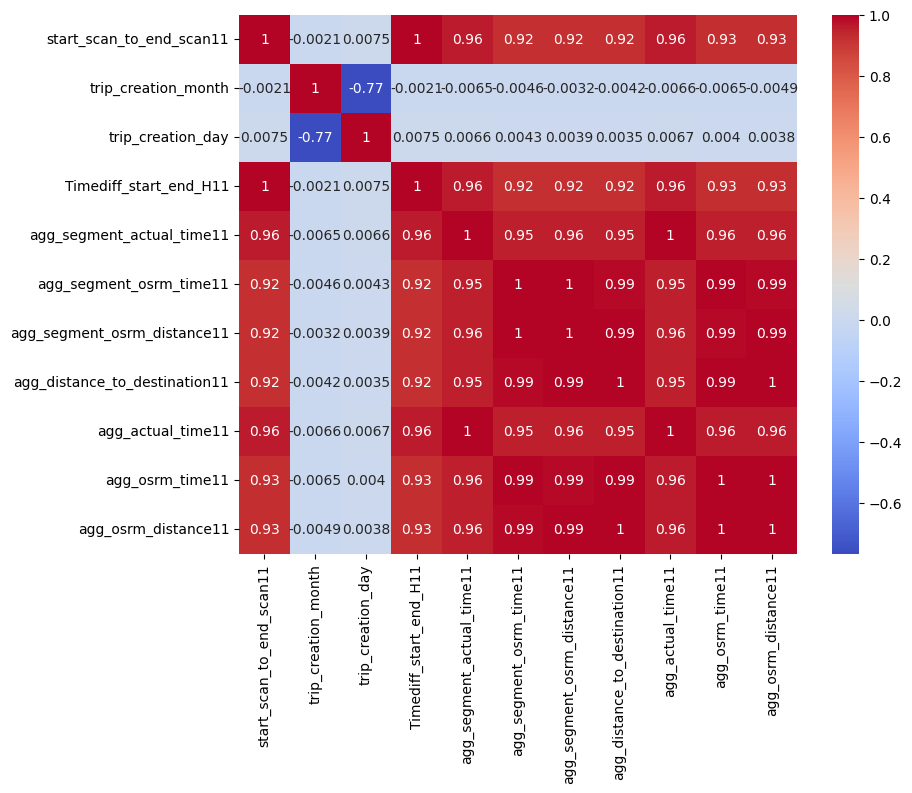

In [114]:
# Select only numerical features for correlation analysis
numerical_features = rel.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
plt.figure(figsize=(9, 7))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.show()




*   Here almost all the features are heavily correlated to each other, except trip creation day and trip creation month which are negatively correlated with others.


*   The positive correlation between the features were above 90% which states that they are well correlated to each other.





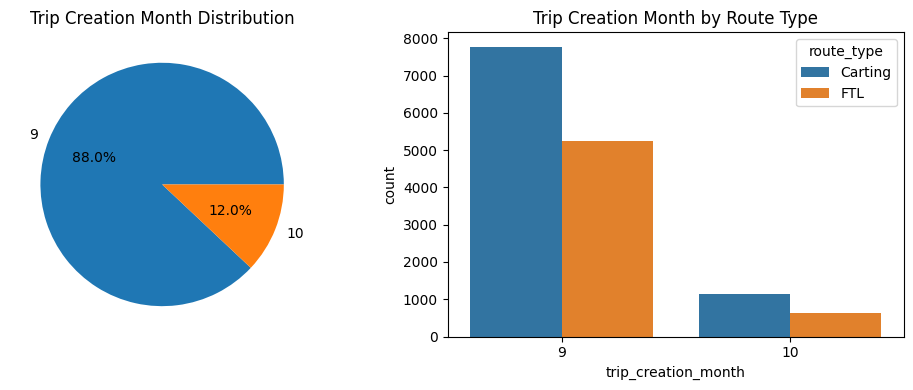

In [115]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# First subplot: Pie chart
axs[0].pie(data_final['trip_creation_month'].value_counts(), labels=data_final['trip_creation_month'].unique(), autopct='%1.1f%%')
axs[0].set_title('Trip Creation Month Distribution')

# Second subplot: Countplot
sns.countplot(data=data_final, x='trip_creation_month', hue='route_type', ax=axs[1])
axs[1].set_title('Trip Creation Month by Route Type')
plt.tight_layout()
plt.show()



*   Almost 88% of trip contribution is from september monther and the remaining is from october month.

*   In both months Carting were the most used route type.



##**One Hot Encoding of Categorical Features**

In [116]:
#One hot endoing of rout_type columns:
mod_df=pd.concat([data_final,pd.get_dummies(data_final['route_type'])],axis=1)

In [117]:
mod_df.head()

,route_type,trip_uuid,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan11,Timediff_start_end_H11,agg_segment_actual_time11,agg_segment_osrm_time11,agg_segment_osrm_distance11,agg_distance_to_destination11,agg_actual_time11,agg_osrm_time11,agg_osrm_distance11,Source_City11,Source_Place11,Source_Code/State11,destination_City11,destination_Place11,destination_Code/State11,Carting,FTL
0,Carting,trip-153741093647649320,9,2018,20,195.0,195.38,167.0,88.0,102.7106,82.981842,170.0,89.0,107.4515,Anand,VUNagar,DC (Gujarat),Anand,Vaghasi,IP (Gujarat),True,False
10,FTL,trip-153768492602129387,9,2018,23,302.0,302.37,180.0,106.0,130.4089,100.708423,183.0,95.0,129.3519,Bhiwandi,Mankoli,HB (Maharashtra),Pune,Tathawde,H (Maharashtra),False,True
15,Carting,trip-153693976643699843,9,2018,14,108.0,108.98,60.0,16.0,18.7941,16.431273,60.0,16.0,18.7941,LowerParel,CP (Maharashtra),None,Mumbai,Chndivli,PC (Maharashtra),True,False
17,FTL,trip-153687145942424248,9,2018,13,1031.0,1031.66,799.0,502.0,560.5092,371.458435,805.0,486.0,524.7155,Bangalore,Nelmngla,H (Karnataka),Aluva,Peedika,H (Kerala),False,True
35,FTL,trip-153825970514894360,9,2018,29,261.0,262.64,151.0,137.0,115.7501,95.488499,152.0,123.0,123.7654,Ludhiana,GillChwk,DC (Punjab),Ludhiana,MilrGanj,HB (Punjab),False,True


In [118]:
#dropping the original column
mod_df.drop(['route_type'],axis=1, inplace=True)

In [119]:
mod_df.head(2)

,trip_uuid,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan11,Timediff_start_end_H11,agg_segment_actual_time11,agg_segment_osrm_time11,agg_segment_osrm_distance11,agg_distance_to_destination11,agg_actual_time11,agg_osrm_time11,agg_osrm_distance11,Source_City11,Source_Place11,Source_Code/State11,destination_City11,destination_Place11,destination_Code/State11,Carting,FTL
0,trip-153741093647649320,9,2018,20,195.0,195.38,167.0,88.0,102.7106,82.981842,170.0,89.0,107.4515,Anand,VUNagar,DC (Gujarat),Anand,Vaghasi,IP (Gujarat),True,False
10,trip-153768492602129387,9,2018,23,302.0,302.37,180.0,106.0,130.4089,100.708423,183.0,95.0,129.3519,Bhiwandi,Mankoli,HB (Maharashtra),Pune,Tathawde,H (Maharashtra),False,True


##**Column Standarization and Normalization Mean centering and Variance scaling (Standard Scaling) MinMax Scaling**

In [120]:
st_df=data_final.loc[:,['start_scan_to_end_scan11', 'trip_creation_month',
       'trip_creation_day', 'Timediff_start_end_H11', 'agg_segment_actual_time11',
       'agg_segment_osrm_time11', 'agg_segment_osrm_distance11',
       'agg_distance_to_destination11', 'agg_actual_time11', 'agg_osrm_time11',
       'agg_osrm_distance11']]

In [123]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

minmax = MinMaxScaler()
scaled_data = minmax.fit_transform(st_df)
scaled_data = pd.DataFrame(scaled_data, columns=st_df.columns)


In [124]:
scaled_data.head()

,start_scan_to_end_scan11,trip_creation_month,trip_creation_day,Timediff_start_end_H11,agg_segment_actual_time11,agg_segment_osrm_time11,agg_segment_osrm_distance11,agg_distance_to_destination11,agg_actual_time11,agg_osrm_time11,agg_osrm_distance11
0,0.021841,0.0,0.655172,0.021831,0.025398,0.032056,0.026643,0.033959,0.025735,0.040967,0.034750
1,0.035429,0.0,0.758621,0.035417,0.027488,0.039093,0.034524,0.042096,0.027813,0.043929,0.042486
2,0.010794,0.0,0.448276,0.010860,0.008198,0.003909,0.002766,0.003410,0.008152,0.004936,0.003434
3,0.128000,0.0,0.413793,0.128024,0.126989,0.193901,0.156901,0.166380,0.127238,0.236920,0.182141
4,0.030222,0.0,0.965517,0.030372,0.022826,0.051212,0.030353,0.039700,0.022858,0.057749,0.040513



*   Since the data's were right skewed and not normally distributed. I had used Min-Max Normalization



#**Actionable Insights and Recommendations**

**Based on EDA:**
* The entire data is heavily right skewed
* Almost all the features are heavy positively correleated with each other & which is intutive as well.
* There is a high -ve correlation between almost all the other features & trip_creation_month
* 60% data is from Carting rout_type & the remaining 40% is from FTL
* 88% of the trips are from September Month & remaining are from October
* Start & End dates of the months have less percent of trips compare to mid of the month. Though the difference is not huge
* Thats very strange to see that there is absolutely no trip from 4th- 11th day of the month
* Most of the orders are coming from Haryana followed by Maharastra and Karnataka
* Least orders are coming from Seven Sisters(NE states)
* Bussiest Route is from source Chandigarh_Mehmdpur_H (Punjab) to Bangalore_Nelmngla_H (Karnataka) Average_osrm_distance between them is 2500 kms & average time taken is 3784 mins

**Based on Hypothesis Testing:**
* There is no difference in the population means of time taken between od_start_time and od_end_time  and start_scan_to_end_scan
* There is a difference between the population means of agg_Actual_time & agg_osrm_time. Mean of
  agg_Actual_time is bigger than that of agg_osrm_time
* There is no difference between the population means of agg_Actual_time & agg_segment_actual_time.
* There is a difference between the population means of agg_osrm_distance & agg_segment_osrm_distance.
* There is a difference between the population means of osrm_time & segment_osrm_time.     

**Recommendations:**

* As its depicted from the analysis that there is absolutely no trip from 4th- 11th day of the month,
  The reason for that can be figured out and catered to receive the orders in the these dates as well.
* Least orders are reaching/coming from North East states, more corridors/campaigns can be promoted to penetrate in these states as well.
* Most of the orders are coming from/reaching to Haryan, Maharashtra & Karnataka, existing corridors can be further enhanced to maintain the penetration from these areas.Also a further profiling of these orders can be made from more rich data to get to know why major orders are coming from these corridors
* FTL route consists of 40% of the total orders. More ways to promote FTL route handling system can be implemented to increase this percentage


*   Most of the orders is from september month, it is advisable to take action to increase the orders during october.


